# 1 Introduction

Welcome to the fifth practical session of CS233 - Introduction to Machine Learning.  
In this exercise class we will start using Machine Learning methods to solve regression problems.

In [1]:
# Useful starting lines
%matplotlib notebook
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt


# 2 Regression Problem

Let $f$ be a function $f: \mathbb{R}^d \rightarrow \mathbb{R}^v$ with a data set $\left(X \subseteq \mathbb{R}^d, y
\subseteq\mathbb{R}^v \right )$. The regression problem is the task of estimating an approximation $\hat{f}$ of $f$.
Within this exercise we consider the special case of $v=1$, i.e. the problem is univariate as opposed to multivariate.
Specifically, we will analyze the Boston house prices data set and predict costs based on properties such as per capita crime rate by town, pupil-teacher ratio by town etc.

We will model the given data by means of a linear regression model, i.e. a model that explains a dependent variable in terms of a linear combination of independent variables.

**Q.** How does a regression problem differ from a classification problem?  
**A.** A classification problem has discrete-valued target variables, whereas the values of target variables in regression problems may be continuous.  
**Q.** Why is the linear regression model a linear model? Is it linear in the dependent variables? Is it linear in the parameters?  
**A.** The linear regression model is linear in the parameters.

# 2.1 Load and inspect data

For this exercise, we have Boston Housing dataset. The task is to predict the price of a house given a set of 12 [features](https://scikit-learn.org/stable/datasets/index.html#boston-dataset). Before jumping into the algorithm directly, it is good visualize some features and the price distribution. This step is called Data Exploration. We load the train and test data.

**Q.** Explore the relation between different features and the house prices. Describe what you see. Can you identify any trends?  
**A.** The relations between feature values and house prices differ between feature dimensions. Some features (e.g. 4) are positively correlated with house prices, some (e.g. 11) are negatively correlated and for many others a clear trend is hard to spot by mere inspection.

In [2]:
X_train    = np.load('X_train.npy')
y_train    = np.load('y_train.npy')
X_test     = np.load('X_test.npy')
y_test     = np.load('y_test.npy')

In [3]:
print(f'Number of training examples: {X_train.shape[0]}')
print(f'Number of test examples: {X_train.shape[0]}')
print(f'Number of features: {X_train.shape[1]}')

Number of training examples: 380
Number of test examples: 380
Number of features: 12


<IPython.core.display.Javascript object>


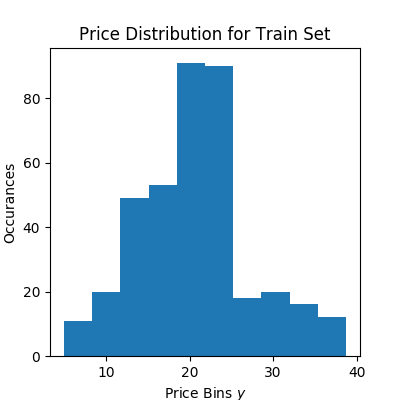

Text(0,0.5,'Occurances')

In [4]:
# Plot the distribution of prices
plt.figure(figsize=(4,4))

plt.title(f"Price Distribution for Train Set")
plt.hist(y_train)
plt.xlabel(f"Price Bins $y$")
plt.ylabel(f"Occurances")


In [ ]:
# Exploratory analysis of the data. Have a look at the distribution of prices vs features
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
feature = 4 # choose different feature index
plt.scatter(X_train[:,feature], y_train)
plt.xlabel(f"Attribute {feature}$")
plt.ylabel("Price $y$")
plt.title(f"Attribute {feature} vs Price $y$")

plt.subplot(1,2,2)
feature = 11 # choose different feature index
plt.scatter(X_train[:,feature], y_train)
plt.xlabel(f"Attribute {feature}$")
plt.ylabel("Price $y$")
plt.title(f"Attribute {feature} vs Price $y$")

We normalize the data such that each feature has zero mean and unit standard deviation. Please fill in the required code and complete the function `normalize`.


In [5]:
'''
Make mean 0 and std dev 1 of the data.
'''
def normalize(X,mean,std):
    """
    Please fill in the required code here
    """ 
    X  = (X-mean)/std
    return X

#Use train stats for normalizing test set
mean  = np.mean(X_train,0,keepdims=True)
std   = np.std(X_train,0,keepdims=True)
norm_X_train = normalize(X_train,mean,std)
norm_X_test = normalize(X_test,mean,std)

# 2.2 Closed-form solution for linear regression

We represent our output $\mathbf{y} \in R^{N\times1}$ as linear combination of variables $\mathbf{X} \in R^{N\times D}$. The objective of linear regression task is to find set of weights $\mathbf{w} \in R^{D\times1}$ for predictor varibles which minimize our loss, simplest being $l_2$ loss function as shown below 
\begin{align}
L(\mathbf{w}) &=\frac{1}{N} \| \mathbf{y} - \mathbf{X}\mathbf{w} \|^2  \\
\nabla L(\mathbf{w}) &= -\frac{2}{N}\mathbf{X}^T(\mathbf{y} - \mathbf{X}\mathbf{w}) 
\end{align}

$\nabla L(\mathbf{w}) = 0$ for minimum condition, we get

\begin{align}
\mathbf{w} &= (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}
\end{align}


This is called an [analytical solution](https://en.wikipedia.org/wiki/Linear_least_squares). 
Please use this solution to complete the function `get_w_analytical` and `get_loss`. Tip: before implementation think about the dimension of returned variable. 

**Q.** What is the time complexity of this approach?  
**A.** Let N be the number of data points. The time complexity is determined by the slowest operation, i.e. the matrix inversion, which is in $\mathcal{O}(N^3)$.

In [6]:
def get_w_analytical(X_train,y_train):
    """
    compute the weight parameters w
    """
    
    """
    Please fill in the required code here
    """
        
    # compute w via the normal equation
    # Tip: use np.linalg.solve instead of np.linalg.inv as it provides stable solution
    w = np.linalg.solve(X_train.T@X_train,X_train.T@y_train)
    return w

def get_loss(w, X_train, y_train,X_test,y_test,val=False):
    # predict dependent variables and MSE loss for seen training data
    """
    Please fill in the required code here
    """
    loss_train = (np.mean((y_train-X_train@w)**2))
    loss_train_std = np.std((y_train-X_train@w)**2)
    
    # predict dependent variables and MSE loss for unseen test data
    """
    Please fill in the required code here
    """
    loss_test = (np.mean((y_test-X_test@w)**2))
    loss_test_std = np.std((y_test-X_test@w)**2)
    if not val:
        print("The training loss is {} with std:{}. The test loss is {} with std:{}.".format(loss_train, loss_train_std, loss_test,loss_test_std))
    else:
        print("The training loss is {} with std:{}. The val loss is {} with std:{}.".format(loss_train, loss_train_std, loss_test,loss_test_std))

    return loss_train, loss_test


In [7]:
# compute w and calculate its goodness
w_ana = get_w_analytical(norm_X_train,y_train)
get_loss(w_ana, norm_X_train, y_train, norm_X_test,y_test)

The training loss is 436.848744249655 with std:142.80383100887934. The test loss is 437.34987954093765 with std:148.91518644294177.


(436.848744249655, 437.34987954093765)

### 2.2.1 Adding $w_0$
We add a bias term i.e. $w_0$ to our formulation such that $y_n = x_n * w_n + x_{n-1} * w_{n-1} + ... + x_1 * w_1 + 1 * w_0$ . This involves making our feature dimension from $D$ to $D+1$ and $\mathbf{X} = [\mathbf{1}  ~~~ \mathbf{X} ]$, which corresponds to adding a column of ones.

**Q.** How does this term help?  
**A.** If we don't have bias term then for $y_n = x_n * w_n + x_{n-1} * w_{n-1} + ... + x_1 * w_1$ at origin $x_n=x_{n-1}=...=x_1=0$ output will be $y_n = 0$ irrespective of $w$'s. Hence our line will always pass through origin restricting the linear model to capture the data. Adding a bias term, helps providing non-zero solution at origin a.k.a intercept.

In [8]:
# add a column of ones to X_train and X_test and see if loss values change.
X_train_aug = np.hstack((np.ones((norm_X_train.shape[0],1)),norm_X_train))
X_test_aug = np.hstack((np.ones((norm_X_test.shape[0],1)),norm_X_test))
w_ana = get_w_analytical(X_train_aug,y_train)
get_loss(w_ana, X_train_aug,y_train, X_test_aug,y_test)

The training loss is 10.404507130540278 with std:18.876977408533154. The test loss is 11.790311742556584 with std:23.812240108124904.


(10.404507130540278, 11.790311742556584)

# 2.3 Numerical solution for linear regression


The linear regression model has an analytical solution, but we can also get the weight parameters $w$ numerically, e.g. via gradient descent. Please use this approach to complete the function `get_w_numerical` below.

**Q.** How do these results compare against those of the analytical solution? Explain the differences or similarities!   
**A.** The analytical solution and the numerical solution are almost identical. But when [condition number](https://blogs.mathworks.com/cleve/2017/07/17/what-is-the-condition-number-of-a-matrix/) of matrix is very high inverse may not be stable and solution will differ. 
**Q.** In which cases, it maybe be preferable to use the numerical approach over the analytical solution?  
**A.** Let N be the number of data points. Computing the analytical solution has run time $\mathcal{O}(N^3)$, which may be problematic if N is very large.

In [9]:
# return the gradient of loss function
def gradient(w,X,y):
    return (2/X.shape[0])*X.T@(y-X@w)

# implement the numerical method to solve linear regression
# max_iteration: number of times Gradient update happens
# lr: learning rate 
def get_w_numerical(X_train,y_train,X_test,y_test,max_iteration,lr):
    """compute the weight parameters w"""
    
    """
    Please fill in the required code here
    """
    
    # initialize the weights
    w  = np.ones(X_train.shape[1])
    
    # iterate a given number of epochs over the training data
    for iteration in range(max_iteration):
                 
        #calculate gradient 
        grad = gradient(w,X_train,y_train)

        # update the weights
        w += lr*grad
            
        if iteration % 500 == 0:
            print(f"Iteration {500+iteration}/{max_iteration}")
            get_loss(w, X_train,y_train, X_test,y_test)
            
    return w

In [14]:
# compute w and calculate its goodness

w_num = get_w_numerical(X_train_aug,y_train,X_test_aug,y_test,6500,1e-2)

Iteration 500/6500
The training loss is 453.5797613082112 with std:350.06310594252915. The test loss is 535.2051146690442 with std:375.98514429790504.
Iteration 1000/6500
The training loss is 10.620087669571918 with std:20.144244185442595. The test loss is 12.365718115626352 with std:26.596705817622663.
Iteration 1500/6500
The training loss is 10.444657962581246 with std:19.18462077960423. The test loss is 11.936985159807323 with std:24.539055924554138.
Iteration 2000/6500
The training loss is 10.414954567069016 with std:18.98998657160119. The test loss is 11.8442063670252 with std:24.101516930429767.
Iteration 2500/6500
The training loss is 10.407349713867397 with std:18.927536826363415. The test loss is 11.813675943126798 with std:23.94942454149712.
Iteration 3000/6500
The training loss is 10.405284408433884 with std:18.901733523523422. The test loss is 11.801414953154437 with std:23.881605541466065.
Iteration 3500/6500
The training loss is 10.404719786686885 with std:18.889570717563

**Q.** What is the stopping criteria for this method?  
**A.** One can check if gradient become very close to zero, also the change in the loss is below a threshold.

# 2.4 Ridge Regression


As seen in the lecture, we suffer from overfitting when the our model complexity increases. There are different ways to tackle this problem, like getting more data, changing the prediction method, regularization, etc. For the task of regression, we'll add a regularization to our training objective to mitigate this problem. Intutively, regularization restricts the domain from which the values of model parameters are taken, which means that we are biasing our model.  

In Ridge Regression, we restrict the $l_2$ norm of the coefficients $\mathbf{w}$. Our loss function looks as following,
\begin{align}
L(\mathbf{w}) &=\frac{1}{N} \| \mathbf{y} - \mathbf{X}\mathbf{w} \|^2 + \frac{\lambda}{N}\|\mathbf{w}\|^2 \\
\nabla L(\mathbf{w}) &= -\frac{2}{N}\mathbf{X}^T(\mathbf{y} - \mathbf{X}\mathbf{w}) + 2\frac{\lambda}{N}\mathbf{w}
\end{align}

$\nabla L(\mathbf{w}) = 0$ for minimum condition, we get

\begin{align}
\mathbf{w} &= (\mathbf{X}^T\mathbf{X}+\lambda\mathbf{I})^{-1}\mathbf{X}^T\mathbf{y}
\end{align}

dimensions are following: $\mathbf{w}$ is $D\times1$; $\mathbf{y}$ is $N\times1$; $\mathbf{X}$ is $N\times D$; $\mathbf{I}$ is identity matrix of dimension $D \times D$ .

$\lambda$ is our penality term, also know as weight decay. By varying its value, we can allow biasing in our model.

**Q.**:
When $\lambda$ is high, our model is more complex or less?

**A.**:
High $\lambda$ penalises the norm term more, hence restricts the value $\mathbf{w}$ can have, rendering simpler model.


For this task, we load same Boston Housing dataset with feature expansion strategy(will be covered in coming lectures) to get a complex model.  
**Q.** What is the features dimension in the complex model?  
**A.** 72

In [11]:
# load the expanded features
X_train_expanded = np.load('X_train_feat_augmentation.npy',)
X_test_expanded = np.load('X_test_feat_augmentation.npy')

# normalize the features
mean  = np.mean(X_train_expanded,0,keepdims=True)
std   = np.std(X_train_expanded,0,keepdims=True)
norm_X_train = normalize(X_train_expanded,mean,std)
norm_X_test = normalize(X_test_expanded,mean,std)

# add the ones column for bias-term
X_train_aug = np.hstack((np.ones((norm_X_train.shape[0],1)),norm_X_train))
X_test_aug = np.hstack((np.ones((norm_X_test.shape[0],1)),norm_X_test))


In [12]:
def get_w_analytical_with_regularization(X_train,y_train,lmda):
    """compute the weight parameters w with ridge regression"""
    
    """
    Please fill in the required code here
    """
    #create lambda matrix 
    lmda_mat = lmda*np.eye(X_train.shape[1])
    # compute w via the normal equation
    # np.linalg.solve is more stable than np.linalg.inv
    w = np.linalg.solve(X_train.T@X_train+lmda_mat,X_train.T@y_train)
    return w

In [13]:
w_reg = get_w_analytical_with_regularization(X_train_aug,y_train,lmda=0)
get_loss(w_reg,X_train_aug,y_train,X_test_aug,y_test)

The training loss is 4.303778691331962 with std:9.095607582173066. The test loss is 14.87699794939581 with std:59.988802632877295.


(4.303778691331962, 14.87699794939581)

**Q.** Compare the above train and test losses w.r.t regression with simpler model?  
**A.** As the complex model overfits the training data, we get smaller training error and poor generalization on test set i.e. high loss on unseen set.

## 2.4.1 Cross Validation


Cross Validation(CV) is used to choose value of $\lambda$. As seen in previous exercise, we will use K-fold CV.
We will use our training set and create K splits of it to choose best $\lambda$ and finally evaluate on our test set.

In [14]:
# Function to split data indices
# num_examples: total samples in the dataset
# k_fold: number fold of CV
# returns: array of shuffled indices with shape (k_fold, num_examples//k_fold)
def fold_indices(num_examples,k_fold):
    ind = np.arange(num_examples)
    split_size = num_examples//k_fold
    
    #important to shuffle your data
    np.random.shuffle(ind)
    
    k_fold_indices = []
    # Generate k_fold set of indices
    k_fold_indices = [ind[k*split_size:(k+1)*split_size] for k in range(k_fold)]
    print(k_fold_indices)     
    return np.array(k_fold_indices)


In [15]:
# Function for using kth split as validation set to get accuracy
# and k-1 splits to train our model
def do_cross_validation_reg(k,k_fold_ind,X,Y,lmda=0):
    
    # use one split as val
    val_ind = k_fold_ind[k]
    # use k-1 split to train
    train_splits = [i for i in range(k_fold_ind.shape[0]) if i is not k]
    train_ind = k_fold_ind[train_splits,:].reshape(-1)
   
    #Get train and val 
    cv_X_train = X[train_ind,:]
    cv_Y_train = Y[train_ind]
    cv_X_val = X[val_ind,:]
    cv_Y_val = Y[val_ind]
    
    #fit on train set using regularised version
    w = get_w_analytical_with_regularization(cv_X_train,cv_Y_train,lmda)
    
    #get loss for val
    loss_train,loss_test = get_loss(w,cv_X_train,cv_Y_train,cv_X_val,cv_Y_val,val=True)
    print(loss_test,lmda)
    return loss_train,loss_test

In [16]:

# Grid Search Function
# params: hyperparameter to tune
# k_fold: fold for CV to be done
# fold_ind: splits of training set
# X,Y: training examples
# return: returns the training and validation loss for the range of hyperparamter

def grid_search_cv(params,k_fold,fold_ind,function,X,Y):
    
    #save the values for the combination of hyperparameters
    grid_train = np.zeros(len(params))
    grid_train_std = np.zeros(len(params))   
    grid_val = np.zeros(len(params))
    grid_val_std = np.zeros(len(params))   
    
    for i, p in enumerate(params):
        print('Evaluating for {} ...'.format(p))
        loss_train = np.zeros(k_fold)
        loss_test = np.zeros(k_fold)
        for k in range(k_fold):
            loss_train,loss_test[k] = function(k,fold_ind,X,Y,p)
        grid_train[i] = np.mean(loss_train)
        grid_train_std[i] = np.std(loss_train)
        grid_val[i] = np.mean(loss_test)
        grid_val_std[i] = np.std(loss_test)
    
    return grid_train, grid_val

Let's do 4-fold CV. 

In [17]:
k_fold = 4
fold_ind = fold_indices(X_train_aug.shape[0],k_fold)

[array([266, 261, 265,  39,  33, 363,  55, 262, 311, 168, 234, 285, 141,
       250, 116, 358, 242,  56, 232,  90,  15, 246, 374,   0,  78, 258,
        25,  46,   9,  76, 318, 280,  42, 208, 194, 148, 101, 157, 108,
       376, 126, 321,  22,  31, 238, 368, 342,  30,  57, 292,  84, 307,
       325, 367, 312,   5, 173,  45, 244, 118,  73, 227, 110, 104, 350,
        72, 210,   3,  18, 317, 239, 316,  63, 229,  82,  94,  77, 220,
       297, 113, 203, 114, 225, 354, 299,  75,  93, 245,  16,  66, 139,
         7, 175, 231, 336]), array([369, 109, 352, 371, 282,  60, 249, 362, 158, 247, 145,  17, 294,
        24, 137, 332, 351, 310, 167, 334, 341, 375, 289, 223, 163, 124,
       277, 119, 196, 165,  19, 155,  79, 132, 140, 291,  36, 357, 356,
       181, 182,  59, 111, 152,   6, 333, 284,  10, 177, 103,  81, 331,
       222, 192, 209, 302, 153,  89, 176, 147, 211,  92,  69, 123,  96,
       143, 287,  97, 271,  68,  23,  37, 144, 122,  67, 172, 198, 202,
       300, 180, 125, 146, 218,  8

In [18]:
#list of lambda values to try.. use np.logspace
search_lambda = np.logspace(-4,1,num=5000)

#call to the grid search function
grid_train,grid_val = grid_search_cv(search_lambda,k_fold,fold_ind,do_cross_validation_reg,X_train_aug,y_train)

Evaluating for 0.0001 ...
The training loss is 4.576986935411677 with std:9.415673448867919. The val loss is 15.192351419267466 with std:58.643174504014844.
15.192351419267466 0.0001
The training loss is 5.3613657894498825 with std:12.873354634698034. The val loss is 825.1941329924827 with std:7918.759830233636.
825.1941329924827 0.0001
The training loss is 5.164381458628816 with std:10.929095004413496. The val loss is 8.063479798216509 with std:17.47439592787978.
8.063479798216509 0.0001
The training loss is 4.6795389709605395 with std:8.217053034410224. The val loss is 14.657702698357333 with std:69.34684251708998.
14.657702698357333 0.0001
Evaluating for 0.00010023056997489601 ...
The training loss is 4.577280214057975 with std:9.416490782239535. The val loss is 15.191647267991694 with std:58.64187334940645.
15.191647267991694 0.00010023056997489601
The training loss is 5.361621025235332 with std:12.873857129773981. The val loss is 825.2355868071091 with std:7919.160206084561.
825.2

The training loss is 5.3731702296474175 with std:12.895832345366466. The val loss is 827.5443237722648 with std:7941.470770324711.
827.5443237722648 0.00011091978058232888
The training loss is 5.178540856964674 with std:10.952935989495131. The val loss is 8.117480111225357 with std:17.825347786414678.
8.117480111225357 0.00011091978058232888
The training loss is 4.693398693836104 with std:8.26208423266446. The val loss is 14.537809546260593 with std:68.21893132243063.
14.537809546260593 0.00011091978058232888
Evaluating for 0.00011117552829257226 ...
The training loss is 4.590736883122797 with std:9.453686208435094. The val loss is 15.155793728001843 with std:58.55389950333088.
15.155793728001843 0.00011117552829257226
The training loss is 5.373440242251565 with std:12.896328826869569. The val loss is 827.6064811132609 with std:7942.071608985969.
827.6064811132609 0.00011117552829257226
The training loss is 5.178855817298907 with std:10.953466457662127. The val loss is 8.11871035359959

The training loss is 5.193383697719659 with std:10.97794083794335. The val loss is 8.176770951699384 with std:18.178285208544796.
8.176770951699384 0.00012359998091132537
The training loss is 4.708549329163953 with std:8.311014251620447. The val loss is 14.400326826242965 with std:66.92111002129572.
14.400326826242965 0.00012359998091132537
Evaluating for 0.00012388496535628408 ...
The training loss is 4.605388494994871 with std:9.493498053683414. The val loss is 15.110014559576962 with std:58.40369062518147.
15.110014559576962 0.00012388496535628408
The training loss is 5.386535497622534 with std:12.91952490333795. The val loss is 830.8828960113981 with std:7973.74724375555.
830.8828960113981 0.00012388496535628408
The training loss is 5.193700663577606 with std:10.978474939100979. The val loss is 8.178065724373015 with std:18.18563142716141.
8.178065724373015 0.00012388496535628408
The training loss is 4.708879630829043 with std:8.31207686101079. The val loss is 14.397269579383261 wi

The training loss is 5.208357612699365 with std:11.003178726521865. The val loss is 8.23918879798516 with std:18.515705171760718.
8.23918879798516 0.00013772976470991882
The training loss is 4.724450635516837 with std:8.361942570614124. The val loss is 14.250872990119765 with std:65.50629366395358.
14.250872990119765 0.00013772976470991882
Evaluating for 0.00013804732819383482 ...
The training loss is 4.620733960788337 with std:9.53443494487362. The val loss is 15.056249485557169 with std:58.198229507896755.
15.056249485557169 0.00013804732819383482
The training loss is 5.400472986606689 with std:12.942467070738495. The val loss is 834.6005919737887 with std:8009.691124333659.
834.6005919737887 0.00013804732819383482
The training loss is 5.208678162488966 with std:11.003719152091646. The val loss is 8.240552353729484 with std:18.52270467594365.
8.240552353729484 0.00013804732819383482
The training loss is 4.724797533513849 with std:8.363048152421321. The val loss is 14.247567243616215 

The training loss is 4.740793475328071 with std:8.413753596716232. The val loss is 14.093557823270753 with std:64.01392212046338.
14.093557823270753 0.000153121793532369
Evaluating for 0.0001534748464132769 ...
The training loss is 4.6365040245479525 with std:9.575718691188788. The val loss is 14.996363812341302 with std:57.94733437697991.
14.996363812341302 0.0001534748464132769
The training loss is 5.414991715833284 with std:12.964697513810165. The val loss is 838.321904302016 with std:8045.6641434028425.
838.321904302016 0.0001534748464132769
The training loss is 5.223533396150291 with std:11.028773371176. The val loss is 8.304954197750698 with std:18.83614216709672.
8.304954197750698 0.0001534748464132769
The training loss is 4.741157672050027 with std:8.41490159939804. The val loss is 14.09002071086472 with std:63.98034004373266.
14.09002071086472 0.0001534748464132769
Evaluating for 0.0001538287133281237 ...
The training loss is 4.636855663982769 with std:9.576630427671937. The v

The training loss is 4.653830948581118 with std:9.620205349448618. The val loss is 14.926673609693744 with std:57.636438667579704.
14.926673609693744 0.00017141420521344695
The training loss is 5.431119280471803 with std:12.987679348695448. The val loss is 841.9562302355913 with std:8080.782405113492.
841.9562302355913 0.00017141420521344695
The training loss is 5.239305193231499 with std:11.0554012815893. The val loss is 8.375841579518939 with std:19.144555831412784.
8.375841579518939 0.00017141420521344695
The training loss is 4.7591008158815145 with std:8.471085985094252. The val loss is 13.914581115338462 with std:62.31369918462302.
13.914581115338462 0.00017141420521344695
Evaluating for 0.00017180943490337583 ...
The training loss is 4.654201927253792 with std:9.621148262200919. The val loss is 14.925146777428926 with std:57.629451522258265.
14.925146777428926 0.00017180943490337583
The training loss is 5.431466178544269 with std:12.988155939176192. The val loss is 842.0269765260

The training loss is 5.447913387036443 with std:13.009987902303195. The val loss is 844.9714819183276 with std:8109.895868899979.
844.9714819183276 0.00019101004691031111
The training loss is 5.255068570495357 with std:11.08205976447259. The val loss is 8.449187792457804 with std:19.427087429277055.
8.449187792457804 0.00019101004691031111
The training loss is 4.777571772867762 with std:8.528126342457448. The val loss is 13.732458303511155 with std:60.582598660798624.
13.732458303511155 0.00019101004691031111
Evaluating for 0.00019145045872752108 ...
The training loss is 4.6721212587313525 with std:9.666239999865383. The val loss is 14.850084076741998 with std:57.27856602342244.
14.850084076741998 0.00019145045872752108
The training loss is 5.448281647208284 with std:13.010460589093372. The val loss is 845.0278376532132 with std:8110.439650489415.
845.0278376532132 0.00019145045872752108
The training loss is 5.255407720114469 with std:11.082633959518121. The val loss is 8.4507928839158

The training loss is 4.79654257483273 with std:8.585838926873091. The val loss is 13.544884975754373 with std:58.80024855665858.
13.544884975754373 0.00021235642874442847
Evaluating for 0.00021284605890887438 ...
The training loss is 4.690613396311343 with std:9.71189336569916. The val loss is 14.770639161894865 with std:56.89427403383517.
14.770639161894865 0.00021284605890887438
The training loss is 5.465717019069245 with std:13.032121257322022. The val loss is 847.1930432042423 with std:8131.310614924025.
847.1930432042423 0.00021284605890887438
The training loss is 5.271188708553161 with std:11.109388930999067. The val loss is 8.526733930982264 with std:19.689747369988787.
8.526733930982264 0.00021284605890887438
The training loss is 4.796964958189223 with std:8.587113704801329. The val loss is 13.540709226650334 with std:58.76058826650462.
13.540709226650334 0.00021284605890887438
Evaluating for 0.0002133368180134677 ...
The training loss is 4.691026253043646 with std:9.7129030285

The training loss is 4.710096080088202 with std:9.759110873043044. The val loss is 14.685708576331978 with std:56.472114205890584.
14.685708576331978 0.00023663273044186064
The training loss is 5.4841187534384215 with std:13.053630279998927. The val loss is 848.3959350511766 with std:8142.849398626197.
848.3959350511766 0.00023663273044186064
The training loss is 5.287336821441563 with std:11.136857185862562. The val loss is 8.606995463985326 with std:19.927471648902404.
8.606995463985326 0.00023663273044186064
The training loss is 4.8168588940169546 with std:8.64664853193376. The val loss is 13.344322843759667 with std:56.89683400575614.
13.344322843759667 0.00023663273044186064
Evaluating for 0.0002371783344690362 ...
The training loss is 4.710530899049786 with std:9.760155025108068. The val loss is 14.683804715507206 with std:56.462535498095775.
14.683804715507206 0.0002371783344690362
The training loss is 5.4845294223849015 with std:13.054096303794266. The val loss is 848.410155021

The training loss is 4.838131125888098 with std:8.709208947136542. The val loss is 13.13542567373534 with std:54.91878566456117.
13.13542567373534 0.000263684266341475
Evaluating for 0.0002642922430881833 ...
The training loss is 4.731519122052089 with std:9.810087487788737. The val loss is 14.591737802347991 with std:55.99403919248109.
14.591737802347991 0.0002642922430881833
The training loss is 5.504331730709952 with std:13.07593042054531. The val loss is 848.4570504174476 with std:8143.311718310525.
848.4570504174476 0.0002642922430881833
The training loss is 5.304591291524124 with std:11.166335235508743. The val loss is 8.695661622367197 with std:20.15569187853628.
8.695661622367197 0.0002642922430881833
The training loss is 4.838594162270416 with std:8.710558086762713. The val loss is 13.130895815164779 with std:54.875957188801074.
13.130895815164779 0.0002642922430881833
Evaluating for 0.00026490162164672385 ...
The training loss is 4.731977504381315 with std:9.811168162233356. 

The training loss is 5.3218852156431815 with std:11.196038987920087. The val loss is 8.787631088170874 with std:20.360926101544095.
8.787631088170874 0.0002945057773213362
The training loss is 4.860847721982258 with std:8.774766128960618. The val loss is 12.914258673959361 with std:52.83164721676265.
12.914258673959361 0.0002945057773213362
Evaluating for 0.0002951848192181733 ...
The training loss is 4.7540823961878855 with std:9.862817772279538. The val loss is 14.492882693903644 with std:55.48069059407207.
14.492882693903644 0.0002951848192181733
The training loss is 5.52553928692855 with std:13.098102758403106. The val loss is 847.1715852851484 with std:8130.718406231666.
847.1715852851484 0.0002951848192181733
The training loss is 5.322257375699278 with std:11.196680119646322. The val loss is 8.789645164718731 with std:20.365112478586507.
8.789645164718731 0.0002951848192181733
The training loss is 4.861331635990754 with std:8.776148651695872. The val loss is 12.909573111345853 wi

The training loss is 5.339559174910562 with std:11.226582403741098. The val loss is 8.884945158676135 with std:20.55052676386212.
8.884945158676135 0.0003281732822052786
The training loss is 4.884059695401248 with std:8.840428671472187. The val loss is 12.690896133432853 with std:50.73345260186057.
12.690896133432853 0.0003281732822052786
Evaluating for 0.0003289299512596747 ...
The training loss is 4.777288135520223 with std:9.916129755645052. The val loss is 14.391985037789748 with std:54.94710797591914.
14.391985037789748 0.0003289299512596747
The training loss is 5.5472150609781075 with std:13.119709537125566. The val loss is 844.5279913909494 with std:8104.961229071186.
844.5279913909494 0.0003289299512596747
The training loss is 5.339939167321331 with std:11.227241310081846. The val loss is 8.887075257162309 with std:20.554414721644928.
8.887075257162309 0.0003289299512596747
The training loss is 4.884563924438516 with std:8.841840296515945. The val loss is 12.68607748337768 with

The training loss is 4.9082209775369625 with std:8.907370668926179. The val loss is 12.46177089101494 with std:48.593670218420755.
12.46177089101494 0.0003656896110254438
Evaluating for 0.00036653278146978253 ...
The training loss is 4.801586635657854 with std:9.971054969354917. The val loss is 14.287719431907721 with std:54.38637387119563.
14.287719431907721 0.00036653278146978253
The training loss is 5.569724332759652 with std:13.141235014074395. The val loss is 840.4747492126847 with std:8065.538906150678.
840.4747492126847 0.00036653278146978253
The training loss is 5.357973016058374 with std:11.258624800231312. The val loss is 8.990044692690962 with std:20.731716697686615.
8.990044692690962 0.00036653278146978253
The training loss is 4.908745261221986 with std:8.908807502143185. The val loss is 12.456841055868836 with std:48.54778953216719.
12.456841055868836 0.00036653278146978253
Evaluating for 0.00036737789601200304 ...
The training loss is 4.802115353600309 with std:9.97224058

The training loss is 4.826954576603873 with std:10.027513714241168. The val loss is 14.180839185506162 with std:53.802142596740715.
14.180839185506162 0.00040843431672148075
The training loss is 5.592989098776029 with std:13.162701488186075. The val loss is 835.006427762554 with std:8012.399696624351.
835.006427762554 0.00040843431672148075
The training loss is 5.376320034078333 with std:11.290787362534314. The val loss is 9.098669940124445 with std:20.901842046753444.
9.098669940124445 0.00040843431672148075
The training loss is 4.933860522305921 with std:8.976860390872561. The val loss is 12.22296463085926 with std:46.37982765693503.
12.22296463085926 0.00040843431672148075
Evaluating for 0.0004093760436230122 ...
The training loss is 4.827505686368325 with std:10.02873087364404. The val loss is 14.178542573474042 with std:53.789484547387126.
14.178542573474042 0.0004093760436230122
The training loss is 5.593491680261086 with std:13.16315774900749. The val loss is 834.8748241741324 w

The training loss is 5.3949314887326425 with std:11.32365979874663. The val loss is 9.212976265740606 with std:21.070894927539616.
9.212976265740606 0.0004551259792011149
The training loss is 4.959889371957204 with std:9.045797835991541. The val loss is 11.98569418817889 with std:44.19988994805234.
11.98569418817889 0.0004551259792011149
Evaluating for 0.00045617536305710414 ...
The training loss is 4.8539264987565565 with std:10.086641978230793. The val loss is 14.069828146917095 with std:53.18518306793521.
14.069828146917095 0.00045617536305710414
The training loss is 5.617438591527804 with std:13.184587838316245. The val loss is 827.9840184261782 with std:7944.194319535457.
827.9840184261782 0.00045617536305710414
The training loss is 5.395329946513598 with std:11.324366277341918. The val loss is 9.215469646577775 with std:21.074531667125857.
9.215469646577775 0.00045617536305710414
The training loss is 4.960452928138742 with std:9.047272680392947. The val loss is 11.980618937202282

The training loss is 5.414152725812638 with std:11.3578660303278. The val loss is 9.335492763253646 with std:21.250043358546968.
9.335492763253646 0.0005083247178281712
The training loss is 4.9873890204879086 with std:9.116897586321514. The val loss is 11.741318959832101 with std:41.97888889333162.
11.741318959832101 0.0005083247178281712
Evaluating for 0.0005094967620024579 ...
The training loss is 4.88191891237665 with std:10.14710581683578. The val loss is 13.957838949938846 with std:52.551770946794754.
13.957838949938846 0.0005094967620024579
The training loss is 5.642487514965496 with std:13.206461698365734. The val loss is 819.5540328123933 with std:7862.346909306233.
819.5540328123933 0.0005094967620024579
The training loss is 5.414554997746926 with std:11.358584624091167. The val loss is 9.338105982604668 with std:21.253906814322814.
9.338105982604668 0.0005094967620024579
The training loss is 4.987971570743774 with std:9.118384694445442. The val loss is 11.736217007056219 with

The training loss is 5.666961787718347 with std:13.22743506435362. The val loss is 810.2107131481713 with std:7771.654851125467.
810.2107131481713 0.0005664357167897822
The training loss is 5.433118518698205 with std:11.391860217765204. The val loss is 9.460908577797357 with std:21.440301328171568.
9.460908577797357 0.0005664357167897822
The training loss is 5.015184002815772 with std:9.186979317926406. The val loss is 11.501573854137593 with std:39.828056496049705.
11.501573854137593 0.0005664357167897822
Evaluating for 0.0005677417474797864 ...
The training loss is 4.910250809383911 with std:10.207431339592691. The val loss is 13.848120771802066 with std:51.919428467118756.
13.848120771802066 0.0005677417474797864
The training loss is 5.667498254739937 with std:13.227891284423684. The val loss is 809.9943113005086 with std:7769.554539199232.
809.9943113005086 0.0005677417474797864
The training loss is 5.433523110442772 with std:11.392587879116055. The val loss is 9.463633398599317 wi

The training loss is 5.452565079172216 with std:11.426942090154629. The val loss is 9.59421409417009 with std:21.65919580922804.
9.59421409417009 0.0006326452214623618
The training loss is 5.044422567532571 with std:9.258799428096477. The val loss is 11.257968706159984 with std:37.676161861285436.
11.257968706159984 0.0006326452214623618
Evaluating for 0.0006341039113906685 ...
The training loss is 4.940048523769975 with std:10.269980990552806. The val loss is 13.736895011885073 with std:51.26485407149747.
13.736895011885073 0.0006341039113906685
The training loss is 5.693436176244157 with std:13.249811153656013. The val loss is 798.9664284970816 with std:7662.532651814839.
798.9664284970816 0.0006341039113906685
The training loss is 5.452970517860153 with std:11.427675707069447. The val loss is 9.597044149432017 with std:21.66409016407522.
9.597044149432017 0.0006341039113906685
The training loss is 5.045040591506304 with std:9.260296713282836. The val loss is 11.252919750028502 with 

The training loss is 5.470801020006563 with std:11.460016204103336. The val loss is 9.723547135137688 with std:21.895648109362003.
9.723547135137688 0.0007017286915106403
The training loss is 5.072581373815723 with std:9.326156103728994. The val loss is 11.032334364030216 with std:35.71851916449301.
11.032334364030216 0.0007017286915106403
Evaluating for 0.0007033466671784945 ...
The training loss is 4.96869579573456 with std:10.329277765008502. The val loss is 13.634138151983429 with std:50.64597257290683.
13.634138151983429 0.0007033466671784945
The training loss is 5.718029221248358 with std:13.270410760954098. The val loss is 787.5311487416262 with std:7551.575003485639.
787.5311487416262 0.0007033466671784945
The training loss is 5.47120582173548 with std:11.460752028357176. The val loss is 9.72646526438129 with std:21.90130877254213.
9.72646526438129 0.0007033466671784945
The training loss is 5.07321506930697 with std:9.327651728172404. The val loss is 11.02736249673007 with std:

9.859569389296784 0.0007801505799675091
The training loss is 5.102076065666868 with std:9.3948385705906. The val loss is 10.80605320916925 with std:33.79567054710263.
10.80605320916925 0.0007801505799675091
Evaluating for 0.0007819493729638912 ...
The training loss is 4.998604880626941 with std:10.39032311251538. The val loss is 13.531299507404112 with std:50.01041591163611.
13.531299507404112 0.0007819493729638912
The training loss is 5.743363719713674 with std:13.291532838988685. The val loss is 774.8072478559524 with std:7428.130688606243.
774.8072478559524 0.0007819493729638912
The training loss is 5.489783252908799 with std:11.494581803350075. The val loss is 9.862564577660287 with std:22.183509491600706.
9.862564577660287 0.0007819493729638912
The training loss is 5.102724927241939 with std:9.3963283209373. The val loss is 10.801195068527697 with std:33.75488283591721.
10.801195068527697 0.0007819493729638912
Evaluating for 0.0007837523134368336 ...
The training loss is 4.9992614

The training loss is 5.132910483879345 with std:9.464638501985045. The val loss is 10.581070899666965 with std:31.931195250819535.
10.581070899666965 0.0008693363463730624
Evaluating for 0.0008713407749686566 ...
The training loss is 5.029720775917107 with std:10.452892598802272. The val loss is 13.429134051834884 with std:49.359731313548586.
13.429134051834884 0.0008713407749686566
The training loss is 5.769374030642623 with std:13.31319272200817. The val loss is 760.7868418149504 with std:7292.125289593562.
760.7868418149504 0.0008713407749686566
The training loss is 5.508630435922375 with std:11.528985937932022. The val loss is 10.004916691870509 with std:22.520977084515067.
10.004916691870509 0.0008713407749686566
The training loss is 5.133573860724931 with std:9.466118054286584. The val loss is 10.576364362457385 with std:31.892755510672583.
10.576364362457385 0.0008713407749686566
Evaluating for 0.0008733498251747606 ...
The training loss is 5.030388180424895 with std:10.45422404

The training loss is 5.794882449894226 with std:13.334474021978004. The val loss is 746.1197638734601 with std:7149.863802847166.
746.1197638734601 0.0009687177097999973
The training loss is 5.52688009248684 with std:11.562315335623476. The val loss is 10.146707711575823 with std:22.90548221842891.
10.146707711575823 0.0009687177097999973
The training loss is 5.164402349351725 with std:9.533865545428599. The val loss is 10.363996601926441 with std:30.185255144063593.
10.363996601926441 0.0009687177097999973
Evaluating for 0.0009709512819802964 ...
The training loss is 5.061295648841789 with std:10.515385402950612. The val loss is 13.330408080701877 with std:48.70878568633854.
13.330408080701877 0.0009709512819802964
The training loss is 5.795437058422305 with std:13.334937564512057. The val loss is 745.7908869492184 with std:7146.67408756351.
745.7908869492184 0.0009709512819802964
The training loss is 5.527274196609328 with std:11.563034722170507. The val loss is 10.149811199709175 wi

The training loss is 5.195120084230246 with std:9.599440018169327. The val loss is 10.1649607809428 with std:28.638517477082583.
10.1649607809428 0.0010744995581723183
Evaluating for 0.001076977031533854 ...
The training loss is 5.091857096866395 with std:10.574877454694937. The val loss is 13.239435894899247 with std:48.085593763350964.
13.239435894899247 0.001076977031533854
The training loss is 5.8203784406719885 with std:13.355835053370132. The val loss is 730.5632195775528 with std:6998.99223852845.
730.5632195775528 0.001076977031533854
The training loss is 5.5448738706020775 with std:11.595118888450978. The val loss is 10.290122846584486 with std:23.34783776509164.
10.290122846584486 0.001076977031533854
The training loss is 5.195808584816867 with std:9.600888174256209. The val loss is 10.160645020497537 with std:28.60562017903118.
10.160645020497537 0.001076977031533854
Evaluating for 0.0010794602172050976 ...
The training loss is 5.092539151035994 with std:10.576193640453745. 

The training loss is 5.844702162800033 with std:13.37633297819615. The val loss is 714.8853949609447 with std:6846.961174781694.
714.8853949609447 0.0011918325522828287
The training loss is 5.561793289640662 with std:11.62583295960558. The val loss is 10.428033640480509 with std:23.827026658039216.
10.428033640480509 0.0011918325522828287
The training loss is 5.226337612170497 with std:9.66416990401003. The val loss is 9.975719840888639 with std:27.224452511878876.
9.975719840888639 0.0011918325522828287
Evaluating for 0.0011945805602994297 ...
The training loss is 5.122642811256344 with std:10.633765539933908. The val loss is 13.152115837846724 with std:47.462092264318315.
13.152115837846724 0.0011945805602994297
The training loss is 5.845253885586775 with std:13.376799469937117. The val loss is 714.5202420711051 with std:6843.420405712415.
714.5202420711051 0.0011945805602994297
The training loss is 5.562174128116539 with std:11.62652218102585. The val loss is 10.43117016394976 with 

The training loss is 5.579126111076938 with std:11.65707368879939. The val loss is 10.572135181804763 with std:24.386548266354996.
10.572135181804763 0.001325026136363281
The training loss is 5.258703661466517 with std:9.729319591526771. The val loss is 9.793418548637733 with std:25.923326870915034.
9.793418548637733 0.001325026136363281
Evaluating for 0.0013280812487932595 ...
The training loss is 5.154241557910927 with std:10.693053607714793. The val loss is 13.066661617602206 with std:46.82342578060241.
13.066661617602206 0.0013280812487932595
The training loss is 5.8705646607897215 with std:13.398280245533938. The val loss is 697.3077271929818 with std:6676.525935502722.
697.3077271929818 0.0013280812487932595
The training loss is 5.579498520641811 with std:11.657741657288186. The val loss is 10.575260553911724 with std:24.399364424459524.
10.575260553911724 0.0013280812487932595
The training loss is 5.259411867381816 with std:9.730723412062567. The val loss is 9.789587137030043 wi

The training loss is 5.186552026333677 with std:10.75237549348664. The val loss is 12.98319952219829 with std:46.167880875055275.
12.98319952219829 0.0014799057132798513
The training loss is 5.896256022505413 with std:13.420250160080146. The val loss is 678.8971904329283 with std:6498.0358831062895.
678.8971904329283 0.0014799057132798513
The training loss is 5.596775093795825 with std:11.68853690527685. The val loss is 10.721493712769817 with std:25.031923564356823.
10.721493712769817 0.0014799057132798513
The training loss is 5.292890918410998 with std:9.796056387542768. The val loss is 9.616084998049512 with std:24.72484302389792.
9.616084998049512 0.0014799057132798513
Evaluating for 0.0014833179315114453 ...
The training loss is 5.187238933466787 with std:10.753621574224717. The val loss is 12.981464206332836 with std:46.15388519066968.
12.981464206332836 0.0014833179315114453
The training loss is 5.896800458234444 with std:13.420717555126695. The val loss is 678.4965883798491 wit

The training loss is 5.326690034880694 with std:9.860035184121891. The val loss is 9.455825432421697 with std:23.707895810612975.
9.455825432421697 0.001649086546616303
Evaluating for 0.0016528888450528497 ...
The training loss is 5.219458868683568 with std:10.811321836897289. The val loss is 12.90168142644741 with std:45.49300627910616.
12.90168142644741 0.0016528888450528497
The training loss is 5.92227159361785 with std:13.44266561517789. The val loss is 659.2570210106991 with std:6307.647396312211.
659.2570210106991 0.0016528888450528497
The training loss is 5.613931861584466 with std:11.718652151795801. The val loss is 10.868889457821608 with std:25.735698803015556.
10.868889457821608 0.0016528888450528497
The training loss is 5.327411969837705 with std:9.861380813190435. The val loss is 9.452562521848792 with std:23.68790933907081.
9.452562521848792 0.0016528888450528497
Evaluating for 0.0016566999104479473 ...
The training loss is 5.220142598613578 with std:10.812529889903706. T

The training loss is 5.251476757741173 with std:10.867114294533714. The val loss is 12.825062378558725 with std:44.82428886802398.
12.825062378558725 0.0018418448776630768
The training loss is 5.947486254617598 with std:13.464535476415923. The val loss is 639.2235951389932 with std:6113.47056744778.
639.2235951389932 0.0018418448776630768
The training loss is 5.630217234185578 with std:11.746662659341062. The val loss is 11.010465031229698 with std:26.47551660358561.
11.010465031229698 0.0018418448776630768
The training loss is 5.361440642798678 with std:9.923851493483218. The val loss is 9.306180079119866 with std:22.823526435961508.
9.306180079119866 0.0018418448776630768
Evaluating for 0.0018460916189351282 ...
The training loss is 5.252154983876957 with std:10.868278347598224. The val loss is 12.823462643973755 with std:44.809955039103905.
12.823462643973755 0.0018460916189351282
The training loss is 5.948019670767655 with std:13.464999462485112. The val loss is 638.788849358256 wi

The training loss is 5.395589218102357 with std:9.984734650155527. The val loss is 9.173466664436104 with std:22.099055049756405.
9.173466664436104 0.0020524021101160288
Evaluating for 0.0020571343331460884 ...
The training loss is 5.283853024823252 with std:10.921801014725576. The val loss is 12.749492965268278 with std:44.130268679151456.
12.749492965268278 0.0020571343331460884
The training loss is 5.97293362137825 with std:13.48671864513111. The val loss is 617.962099130277 with std:5907.416356958239.
617.962099130277 0.0020571343331460884
The training loss is 5.64629441315021 with std:11.773600290582982. The val loss is 11.151467355137584 with std:27.275810780293487.
11.151467355137584 0.0020571343331460884
The training loss is 5.39631627678602 with std:9.986012045902278. The val loss is 9.17079070094968 with std:22.085074190760274.
9.17079070094968 0.0020571343331460884
Evaluating for 0.0020618774672616007 ...
The training loss is 5.284523248981704 with std:10.922913378377231. Th

The training loss is 5.9959588163740625 with std:13.506846258516807. The val loss is 597.7773654500548 with std:5711.821754576034.
597.7773654500548 0.002276519917207787
The training loss is 5.660520773953437 with std:11.79668737797704. The val loss is 11.27695523215781 with std:28.04264986894154.
11.27695523215781 0.002276519917207787
The training loss is 5.428293137457034 with std:10.041447859626016. The val loss is 9.059062064945525 with std:21.525055535452992.
9.059062064945525 0.002276519917207787
Evaluating for 0.0022817688886093957 ...
The training loss is 5.313809249163591 with std:10.970680797573374. The val loss is 12.680478329085764 with std:43.466608049860454.
12.680478329085764 0.0022817688886093957
The training loss is 5.996478537480623 with std:13.507300817863838. The val loss is 597.3110389206487 with std:5707.303221786822.
597.3110389206487 0.0022817688886093957
The training loss is 5.660838320896182 with std:11.79719339159668. The val loss is 11.27976161050099 with st

The training loss is 5.674859514050498 with std:11.819070362161238. The val loss is 11.403807886172402 with std:28.871808031707154.
11.403807886172402 0.0025309330446413856
The training loss is 5.46162139648696 with std:10.09774171789874. The val loss is 8.95457471453716 with std:21.045913633973626.
8.95457471453716 0.0025309330446413856
Evaluating for 0.0025367686163270506 ...
The training loss is 5.34393943763784 with std:11.017985598430041. The val loss is 12.611065244066836 with std:42.77229702885357.
12.611065244066836 0.0025367686163270506
The training loss is 6.02020364429359 with std:13.528042389680222. The val loss is 575.5038661772218 with std:5496.013486403395.
575.5038661772218 0.0025367686163270506
The training loss is 5.675165115507027 with std:11.819536295668234. The val loss is 11.406513226869315 with std:28.890098124324652.
11.406513226869315 0.0025367686163270506
The training loss is 5.462343913499914 with std:10.098946065996998. The val loss is 8.952439621409203 with

The training loss is 5.495446302242268 with std:10.153427779924256. The val loss is 8.860297027061616 with std:20.653842223620444.
8.860297027061616 0.002820265910761774
Evaluating for 0.002826768597164218 ...
The training loss is 5.374118564010981 with std:11.06327306717415. The val loss is 12.54055511095185 with std:42.04334460975707.
12.54055511095185 0.002826768597164218
The training loss is 6.044056551091231 with std:13.54883027975638. The val loss is 552.523501975701 with std:5273.385470337093.
552.523501975701 0.002826768597164218
The training loss is 5.689234965073486 with std:11.840411219106509. The val loss is 11.531031053030146 with std:29.76029506251875.
11.531031053030146 0.002826768597164218
The training loss is 5.496162556586275 with std:10.154591944212054. The val loss is 8.858423414714393 with std:20.646458478312898.
8.858423414714393 0.002826768597164218
Evaluating for 0.0028332862768090683 ...
The training loss is 5.374753365045019 with std:11.064201282838985. The va

The training loss is 5.4023586859857895 with std:11.103512204334676. The val loss is 12.472678919332106 with std:41.32423576764874.
12.472678919332106 0.003135445525544727
The training loss is 6.066501504051363 with std:13.56825783175275. The val loss is 529.8947852150135 with std:5054.192389120939.
529.8947852150135 0.003135445525544727
The training loss is 5.70217129499816 with std:11.858467727258283. The val loss is 11.645253243973167 with std:30.609345958931247.
11.645253243973167 0.003135445525544727
The training loss is 5.528206782255515 with std:10.206068408029733. The val loss is 8.779585173861246 with std:20.35082741597656.
8.779585173861246 0.003135445525544727
Evaluating for 0.0031426749215058536 ...
The training loss is 5.402978410158415 with std:11.104370060286492. The val loss is 12.471160788614759 with std:41.308001433531985.
12.471160788614759 0.0031426749215058536
The training loss is 6.066995743077977 with std:13.56868356540042. The val loss is 529.385294311438 with s

Evaluating for 0.0034858481273501653 ...
The training loss is 5.430491148862431 with std:11.141269508431922. The val loss is 12.402157206106589 with std:40.565252108682266.
12.402157206106589 0.0034858481273501653
The training loss is 6.089025758790559 with std:13.587541156433867. The val loss is 506.1772131906503 with std:4824.4815440962175.
506.1772131906503 0.0034858481273501653
The training loss is 5.714865690629508 with std:11.874909581991647. The val loss is 11.756796618972384 with std:31.48879522808815.
11.756796618972384 0.0034858481273501653
The training loss is 5.560506221261613 with std:10.256809897786958. The val loss is 8.709561596087312 with std:20.11379928814369.
8.709561596087312 0.0034858481273501653
Evaluating for 0.00349388544650231 ...
The training loss is 5.4310939760040196 with std:11.142050882397422. The val loss is 12.400605710948714 with std:40.54846710666966.
12.400605710948714 0.00349388544650231
The training loss is 6.089510565422355 with std:13.587953187426

The training loss is 5.45840146975593 with std:11.176114554434522. The val loss is 12.328135908635232 with std:39.762522947627886.
12.328135908635232 0.0038843456030862402
The training loss is 6.111583312375242 with std:13.606544778691713. The val loss is 481.39483835504257 with std:4584.489239609042.
481.39483835504257 0.0038843456030862402
The training loss is 5.727303240688117 with std:11.889553719354879. The val loss is 11.865257056538907 with std:32.395770052652665.
11.865257056538907 0.0038843456030862402
The training loss is 5.592911429774609 with std:10.30664222438659. The val loss is 8.648215868770158 with std:19.926679163614974.
8.648215868770158 0.0038843456030862402
Evaluating for 0.0038933017377681504 ...
The training loss is 5.458985721847499 with std:11.17681352161742. The val loss is 12.32653378293692 with std:39.745129277319464.
12.32653378293692 0.0038933017377681504
The training loss is 6.112058143617237 with std:13.60694072915688. The val loss is 480.86207439935225 

The training loss is 6.133666848130857 with std:13.624746644541668. The val loss is 456.136979306679 with std:4339.924610697768.
456.136979306679 0.004328398774987638
The training loss is 5.739231092726723 with std:11.90198548261218. The val loss is 11.9681973529072 with std:33.30869973597067.
11.9681973529072 0.004328398774987638
The training loss is 5.624598751928181 with std:10.354399882807932. The val loss is 8.596290421243003 with std:19.78342823109232.
8.596290421243003 0.004328398774987638
Evaluating for 0.0043383787629565265 ...
The training loss is 5.485978110542683 with std:11.20761056707432. The val loss is 12.24970372418855 with std:38.91225121099209.
12.24970372418855 0.0043383787629565265
The training loss is 6.134131505485842 with std:13.625124542972275. The val loss is 455.5950904012989 with std:4334.678006484981.
455.5950904012989 0.0043383787629565265
The training loss is 5.7394795982798525 with std:11.902225797368207. The val loss is 11.97032852000558 with std:33.328

The training loss is 5.510940019499337 with std:11.233230290887597. The val loss is 12.172916984914153 with std:38.085758100941284.
12.172916984914153 0.004812120204701727
The training loss is 6.154816103707869 with std:13.641699652263462. The val loss is 431.0491277222188 with std:4097.037611491871.
431.0491277222188 0.004812120204701727
The training loss is 5.750447577893123 with std:11.911994244195567. The val loss is 12.063745996858573 with std:34.20665797809186.
12.063745996858573 0.004812120204701727
The training loss is 5.654815633968862 with std:10.39910462137917. The val loss is 8.553724790531682 with std:19.675896357416715.
8.553724790531682 0.004812120204701727
Evaluating for 0.004823215509049674 ...
The training loss is 5.511484713593481 with std:11.233755674673056. The val loss is 12.171170413426008 with std:38.067061386309206.
12.171170413426008 0.004823215509049674
The training loss is 6.155270770603957 with std:13.642058150748424. The val loss is 430.5004803912121 with 

The training loss is 6.175953066131103 with std:13.658063197025534. The val loss is 405.1522009215776 with std:3846.349828117692.
405.1522009215776 0.005362235322875254
The training loss is 5.761485217293257 with std:11.920015583951882. The val loss is 12.156296831549552 with std:35.128474093252706.
12.156296831549552 0.005362235322875254
The training loss is 5.684786240241366 with std:10.442684827396734. The val loss is 8.51780222457726 with std:19.591000709510904.
8.51780222457726 0.005362235322875254
Evaluating for 0.005374599027513073 ...
The training loss is 5.536587366605074 with std:11.25625275287064. The val loss is 12.086920275779574 with std:37.17192173517962.
12.086920275779574 0.005374599027513073
The training loss is 6.176397670268624 with std:13.65840032365549. The val loss is 404.5992210848548 with std:3840.997218064794.
404.5992210848548 0.005374599027513073
The training loss is 5.761715793775745 with std:11.920162133231216. The val loss is 12.158212509784123 with std:3

The training loss is 5.772148919405659 with std:11.925825606545015. The val loss is 12.24404499764153 with std:36.05551600109642.
12.24404499764153 0.00597523886244511
The training loss is 5.7137698918466855 with std:10.484145186795544. The val loss is 8.488694446155407 with std:19.524354237243706.
8.488694446155407 0.00597523886244511
Evaluating for 0.0059890159691902275 ...
The training loss is 5.560709118539408 with std:11.274382520904984. The val loss is 11.998112057054316 with std:36.24463973969668.
11.998112057054316 0.0059890159691902275
The training loss is 6.197058932578772 with std:13.673705302638977. The val loss is 378.5635299626713 with std:3588.9993247122925.
378.5635299626713 0.0059890159691902275
The training loss is 5.77237217978543 with std:11.92592542062746. The val loss is 12.245862641502697 with std:36.07530868513793.
12.245862641502697 0.0059890159691902275
The training loss is 5.714375397702266 with std:10.485004369397116. The val loss is 8.488143314685223 with s

The training loss is 5.7822826149765385 with std:11.929403780246592. The val loss is 12.32566529577794 with std:36.969623417007305.
12.32566529577794 0.006643003372066437
The training loss is 5.7411273464892405 with std:10.52268481526331. The val loss is 8.466050391390711 with std:19.4713054300363.
8.466050391390711 0.006643003372066437
Evaluating for 0.006658320143273752 ...
The training loss is 5.583371228585647 with std:11.287823944234. The val loss is 11.906401013164542 with std:35.30649192477478.
11.906401013164542 0.006658320143273752
The training loss is 6.21684930851375 with std:13.687626367157021. The val loss is 353.09117299236925 with std:3342.485074784771.
353.09117299236925 0.006658320143273752
The training loss is 5.782500057020658 with std:11.929458737853134. The val loss is 12.327396083678718 with std:36.989587265902365.
12.327396083678718 0.006658320143273752
The training loss is 5.741710692187129 with std:10.523500427361734. The val loss is 8.465617127764475 with std:

The training loss is 6.236240617535867 with std:13.700458495102618. The val loss is 327.7767305056947 with std:3097.52953119344.
327.7767305056947 0.007402422594695348
The training loss is 5.792394320344608 with std:11.930955847840279. The val loss is 12.405171178464462 with std:37.91312652188365.
12.405171178464462 0.007402422594695348
The training loss is 5.76801283386373 with std:10.560009841827467. The val loss is 8.44818143608014 with std:19.425062079331738.
8.44818143608014 0.007402422594695348
Evaluating for 0.007419490358613634 ...
The training loss is 5.605578222135728 with std:11.297116328629224. The val loss is 11.807539270855848 with std:34.31810205056316.
11.807539270855848 0.007419490358613634
The training loss is 6.23665798548808 with std:13.700725106725521. The val loss is 327.2293254580493 with std:3092.2328951919267.
327.2293254580493 0.007419490358613634
The training loss is 5.792607337167413 with std:11.930966227337375. The val loss is 12.406823850066171 with std:37

The training loss is 5.802336023629023 with std:11.930448568122184. The val loss is 12.48127557912803 with std:38.86956945120759.
12.48127557912803 0.008248657602805172
The training loss is 5.793805328691312 with std:10.595307866354057. The val loss is 8.434999434677739 with std:19.383277188643092.
8.434999434677739 0.008248657602805172
Evaluating for 0.008267676530569219 ...
The training loss is 5.626862417706821 with std:11.301905530362912. The val loss is 11.703340969298832 with std:33.3019573180887.
11.703340969298832 0.008267676530569219
The training loss is 6.256087678033374 with std:13.712653407541888. The val loss is 301.69859502610575 with std:2845.216073573176.
301.69859502610575 0.008267676530569219
The training loss is 5.802546289206988 with std:11.930415986820973. The val loss is 12.48286206272535 with std:38.890087621354375.
12.48286206272535 0.008267676530569219
The training loss is 5.794342237401379 with std:10.596037308496062. The val loss is 8.434765625098231 with std

The training loss is 5.817996469949468 with std:10.627954130233725. The val loss is 8.426094756020493 with std:19.34397488127526.
8.426094756020493 0.009170488666964077
Evaluating for 0.009191633060381338 ...
The training loss is 5.646848957799714 with std:11.302249771800872. The val loss is 11.596214860341894 with std:32.28393441754396.
11.596214860341894 0.009191633060381338
The training loss is 6.274780446988036 with std:13.723171247235337. The val loss is 277.1959071401588 with std:2608.1756440895815.
277.1959071401588 0.009191633060381338
The training loss is 5.812189331103687 with std:11.927965998363442. The val loss is 12.554563625334245 with std:39.84286239215442.
12.554563625334245 0.009191633060381338
The training loss is 5.818510953951282 with std:10.628643495189865. The val loss is 8.425941517168331 with std:19.34312142816463.
8.425941517168331 0.009191633060381338
Evaluating for 0.009212826206421193 ...
The training loss is 5.647274605237509 with std:11.302209847551758. Th

The training loss is 5.66606139506358 with std:11.298346310460445. The val loss is 11.484168383690749 with std:31.247076259220975.
11.484168383690749 0.01021884661359367
The training loss is 6.293202032433167 with std:13.732529085625364. The val loss is 253.3338135491989 with std:2377.361312677277.
253.3338135491989 0.01021884661359367
The training loss is 5.821831106502995 with std:11.923719957404675. The val loss is 12.62417131668137 with std:40.8159482434389.
12.62417131668137 0.01021884661359367
The training loss is 5.841664199901041 with std:10.659447525000159. The val loss is 8.420604685699534 with std:19.30328604601019.
8.420604685699534 0.01021884661359367
Evaluating for 0.010242408205665295 ...
The training loss is 5.666470990074459 with std:11.298214820706601. The val loss is 11.481680043852108 with std:31.224365799957678.
11.481680043852108 0.010242408205665295
The training loss is 6.293599882886285 with std:13.73271954817962. The val loss is 252.82335901666494 with std:2372

The training loss is 6.311799751601088 with std:13.74088134357554. The val loss is 229.77544715416593 with std:2149.5142317203613.
229.77544715416593 0.011387051432530163
The training loss is 5.831770621455523 with std:11.91764000650051. The val loss is 12.693782275037416 with std:41.835720630591915.
12.693782275037416 0.011387051432530163
The training loss is 5.864317296407155 with std:10.689154230390256. The val loss is 8.418357480193833 with std:19.260381041920795.
8.418357480193833 0.011387051432530163
Evaluating for 0.011413306554159544 ...
The training loss is 5.685363765022901 with std:11.28983178839789. The val loss is 11.36234888818365 with std:30.1510216274707.
11.36234888818365 0.011413306554159544
The training loss is 6.3121934227102185 with std:13.741045714541007. The val loss is 229.28437807866288 with std:2144.765130960142.
229.28437807866288 0.011413306554159544
The training loss is 5.831983753545076 with std:11.917492447949718. The val loss is 12.69525180654831 with st

The training loss is 5.841893891982317 with std:11.909930613777895. The val loss is 12.762563358980719 with std:42.886123844017895.
12.762563358980719 0.01268880385723765
The training loss is 5.886020339544929 with std:10.71718552284951. The val loss is 8.419019032485627 with std:19.213977216066645.
8.419019032485627 0.01268880385723765
Evaluating for 0.012718060429105888 ...
The training loss is 5.7036184634649 with std:11.277222777656974. The val loss is 11.238723617984187 with std:29.071011621405994.
11.238723617984187 0.012718060429105888
The training loss is 6.3306225474561995 with std:13.74814209262124. The val loss is 206.7328037251027 with std:1926.685040793589.
206.7328037251027 0.012718060429105888
The training loss is 5.842111990726924 with std:11.909749929922414. The val loss is 12.764023053665708 with std:42.908841714868196.
12.764023053665708 0.012718060429105888
The training loss is 5.8864723515569874 with std:10.717764621567358. The val loss is 8.419062645066397 with st

The training loss is 5.721337122256993 with std:11.260546793766585. The val loss is 11.111466115628975 with std:27.99262368985849.
11.111466115628975 0.014171972014493913
The training loss is 6.348951913998992 with std:13.75400273924038. The val loss is 185.30640465096945 with std:1719.5142629622942.
185.30640465096945 0.014171972014493913
The training loss is 5.852524042287137 with std:11.900528208463177. The val loss is 12.832707375238169 with std:43.99561294594582.
12.832707375238169 0.014171972014493913
The training loss is 5.907289140236033 with std:10.744213815350465. The val loss is 8.422420023566028 with std:19.16198533936041.
8.422420023566028 0.014171972014493913
Evaluating for 0.014204648326810001 ...
The training loss is 5.721709090693253 with std:11.260149171109257. The val loss is 11.10872474521827 with std:27.969763604143.
11.10872474521827 0.014204648326810001
The training loss is 6.349341303076404 with std:13.754113967629733. The val loss is 184.863647754187 with std:1

The training loss is 6.367248381509952 with std:13.758622082880297. The val loss is 165.1224487279785 with std:1524.3846284828223.
165.1224487279785 0.01579209281943303
The training loss is 5.863319338530475 with std:11.889989116459411. The val loss is 12.902051964695273 with std:45.12292240084011.
12.902051964695273 0.01579209281943303
The training loss is 5.9273354335985395 with std:10.769252664093596. The val loss is 8.428209139557946 with std:19.105875035811316.
8.428209139557946 0.01579209281943303
Evaluating for 0.01582850464388235 ...
The training loss is 5.738995146934932 with std:11.239522991009276. The val loss is 10.978599219670471 with std:26.902687331329396.
10.978599219670471 0.01582850464388235
The training loss is 6.367637808605528 with std:13.758706838104862. The val loss is 164.70723028394383 with std:1520.3707860556997.
164.70723028394383 0.01582850464388235
The training loss is 5.863553919752405 with std:11.889751829416376. The val loss is 12.903540102021758 with st

The training loss is 5.874597490573172 with std:11.878308245150338. The val loss is 12.97281659393738 with std:46.29547679439468.
12.97281659393738 0.017597423658650538
The training loss is 5.946720298342664 with std:10.793029637156636. The val loss is 8.436276444514348 with std:19.04414891586031.
8.436276444514348 0.017597423658650538
Evaluating for 0.017637998033962637 ...
The training loss is 5.755977527499246 with std:11.215266861277758. The val loss is 10.846631988090152 with std:25.857012324574793.
10.846631988090152 0.017637998033962637
The training loss is 6.385971165638582 with std:13.76205237759235. The val loss is 145.88823234925883 with std:1338.4650301180886.
145.88823234925883 0.017637998033962637
The training loss is 5.8748434216604295 with std:11.87804866807514. The val loss is 12.974343251085303 with std:46.320949341266186.
12.974343251085303 0.017637998033962637
The training loss is 5.947126415278466 with std:10.793522963294071. The val loss is 8.436471963796006 with 

The training loss is 5.9655633855021 with std:10.81570316792845. The val loss is 8.446511194411991 with std:18.97652315941852.
8.446511194411991 0.01960913749449147
Evaluating for 0.019654350277889844 ...
The training loss is 5.772780336704661 with std:11.187654771678302. The val loss is 10.713903154528436 with std:24.84351912442015.
10.713903154528436 0.019654350277889844
The training loss is 6.404410552953471 with std:13.764144424619316. The val loss is 128.47300995681198 with std:1170.1552454769758.
128.47300995681198 0.019654350277889844
The training loss is 5.886716326694343 with std:11.865396214936615. The val loss is 13.047347593579776 with std:47.54427445202989.
13.047347593579776 0.019654350277889844
The training loss is 5.965959341057646 with std:10.816174805874981. The val loss is 8.446751887746892 with std:18.97501900806106.
8.446751887746892 0.019654350277889844
Evaluating for 0.01969966730839155 ...
The training loss is 5.773136821991186 with std:11.187033034821727. The v

The training loss is 5.983604112209191 with std:10.83698686679326. The val loss is 8.458552401768516 with std:18.904496736410994.
8.458552401768516 0.021800562203117758
Evaluating for 0.02185082775391668 ...
The training loss is 5.78917439428055 with std:11.157680174310457. The val loss is 10.584395674093617 with std:23.8932788857711.
10.584395674093617 0.02185082775391668
The training loss is 6.422627320919233 with std:13.764972871958186. The val loss is 112.82519020032797 with std:1018.9522027628682.
112.82519020032797 0.02185082775391668
The training loss is 5.898993756885076 with std:11.852286111077063. The val loss is 13.12166237506435 with std:48.79361982395757.
13.12166237506435 0.02185082775391668
The training loss is 5.983992836578826 with std:10.83744082094638. The val loss is 8.458835992589375 with std:18.902866567991264.
8.458835992589375 0.02185082775391668
Evaluating for 0.021901209201983456 ...
The training loss is 5.789531138724301 with std:11.156998550269533. The val l

The training loss is 5.912008186347671 with std:11.838655328217694. The val loss is 13.199517751357785 with std:50.097779485417846.
13.199517751357785 0.024292773191716868
The training loss is 6.0017590458010766 with std:10.857979131919528. The val loss is 8.472870620728605 with std:18.824935966611985.
8.472870620728605 0.024292773191716868
Evaluating for 0.024348785032766558 ...
The training loss is 5.805999314694962 with std:11.124381972645875. The val loss is 10.453710932576737 with std:22.97543432785311.
10.453710932576737 0.024348785032766558
The training loss is 6.441482423144404 with std:13.764570577732343. The val loss is 98.27625152314238 with std:878.393202199721.
98.27625152314238 0.024348785032766558
The training loss is 5.912299913310162 with std:11.838354743996236. The val loss is 13.201254732674897 with std:50.12676117061365.
13.201254732674897 0.024348785032766558
The training loss is 6.00214326997474 with std:10.858418816739254. The val loss is 8.47319709011563 with st

The training loss is 6.4598294786285075 with std:13.76300395540025. The val loss is 85.69715894629144 with std:756.8890047572356.
85.69715894629144 0.02700761893280757
The training loss is 5.925841015138405 with std:11.824708555787401. The val loss is 13.281595543121407 with std:51.45949281493265.
13.281595543121407 0.02700761893280757
The training loss is 6.019388461929162 with std:10.877962949480123. The val loss is 8.488818431003615 with std:18.74132997744613.
8.488818431003615 0.02700761893280757
Evaluating for 0.027069890393000957 ...
The training loss is 5.822662167727284 with std:11.089542958509929. The val loss is 10.328649455678013 with std:22.138407962615485.
10.328649455678013 0.027069890393000957
The training loss is 6.460240949233943 with std:13.762956060066815. The val loss is 85.43241810550619 with std:754.3320868993637.
85.43241810550619 0.027069890393000957
The training loss is 5.926151393673153 with std:11.824403423420407. The val loss is 13.283431676887108 with std:5

The training loss is 5.940237354502816 with std:11.810961516651629. The val loss is 13.366600259254257 with std:52.84930547233282.
13.366600259254257 0.02995679166078167
The training loss is 6.036630212957012 with std:10.897150162687113. The val loss is 8.506239163523533 with std:18.654231635045534.
8.506239163523533 0.02995679166078167
Evaluating for 0.030025863027793583 ...
The training loss is 5.839265590109408 with std:11.053685517449116. The val loss is 10.210217216782084 with std:21.38590064332204.
10.210217216782084 0.030025863027793583
The training loss is 6.478947932330653 with std:13.760216272568556. The val loss is 74.1706117652411 with std:645.5752978282325.
74.1706117652411 0.030025863027793583
The training loss is 5.940567487737256 with std:11.8106564143712. The val loss is 13.368546677863645 with std:52.88084964948105.
13.368546677863645 0.030025863027793583
The training loss is 6.037014287457613 with std:10.897573841320192. The val loss is 8.506646481784987 with std:18.

The training loss is 5.857045368479264 with std:11.014786829405908. The val loss is 10.091887908622875 with std:20.67624182448868.
10.091887908622875 0.03345837935846588
The training loss is 6.498931718534373 with std:13.756148666062769. The val loss is 63.72991785456375 with std:544.7722230396236.
63.72991785456375 0.03345837935846588
The training loss is 5.956607600655863 with std:11.796413123529824. The val loss is 13.463054541209994 with std:54.39611509380149.
13.463054541209994 0.03345837935846588
The training loss is 6.055159616998505 with std:10.917424514249317. The val loss is 8.52676618764634 with std:18.555815809010497.
8.52676618764634 0.03345837935846588
Evaluating for 0.03353552433535331 ...
The training loss is 5.857429394518965 with std:11.013946479222218. The val loss is 10.089438853598834 with std:20.662024266409073.
10.089438853598834 0.03353552433535331
The training loss is 6.499362373950974 with std:13.756048952135655. The val loss is 63.521950122663846 with std:542

The training loss is 5.97333889841851 with std:11.782804743082973. The val loss is 13.561661476822518 with std:55.94135935746534.
13.561661476822518 0.037197530009907394
The training loss is 6.073189726277994 with std:10.936875727616886. The val loss is 8.548273583915407 with std:18.456488289873132.
8.548273583915407 0.037197530009907394
Evaluating for 0.037283296345513174 ...
The training loss is 5.875391069926988 with std:10.974876468255468. The val loss is 9.98026537024973 with std:20.048680607689633.
9.98026537024973 0.037283296345513174
The training loss is 6.519443088105331 with std:13.750883120828961. The val loss is 54.56781262730232 with std:456.3380993775435.
54.56781262730232 0.037283296345513174
The training loss is 5.973714356139272 with std:11.782514185568816. The val loss is 13.56387604913015 with std:55.975634309557336.
13.56387604913015 0.037283296345513174
The training loss is 6.0735856799799715 with std:10.937300429394337. The val loss is 8.548760641753217 with std:1

The training loss is 6.091623272229177 with std:10.956565845996463. The val loss is 8.571513529175578 with std:18.352614228541757.
8.571513529175578 0.04135455050030265
Evaluating for 0.041449901677009515 ...
The training loss is 5.894004677528536 with std:10.935315556597468. The val loss is 9.878628879393647 with std:19.51551161598677.
9.878628879393647 0.041449901677009515
The training loss is 6.540101326329972 with std:13.744621099948807. The val loss is 46.756587521830205 with std:380.96657452599817.
46.756587521830205 0.041449901677009515
The training loss is 5.99154015935001 with std:11.769464739546459. The val loss is 13.66916372960874 with std:57.58340864465304.
13.66916372960874 0.041449901677009515
The training loss is 6.092029483861465 with std:10.956998236500182. The val loss is 8.572037400843874 with std:18.3503083794429.
8.572037400843874 0.041449901677009515
Evaluating for 0.041545472704900624 ...
The training loss is 5.894417337071723 with std:10.934453710313042. The va

The training loss is 5.91380273371356 with std:10.894896543681464. The val loss is 9.783596741666013 with std:19.052492007060376.
9.783596741666013 0.04618839876131968
The training loss is 6.561880882569192 with std:13.73716553440886. The val loss is 39.86396683898388 with std:314.4834075989194.
39.86396683898388 0.04618839876131968
The training loss is 6.010899464818109 with std:11.756918123155197. The val loss is 13.783917608464241 with std:59.28799547351677.
13.783917608464241 0.04618839876131968
The training loss is 6.111432882708929 with std:10.977615896337918. The val loss is 8.597520274586788 with std:18.239779326098734.
8.597520274586788 0.04618839876131968
Evaluating for 0.04629489534074852 ...
The training loss is 5.914233292303972 with std:10.894040475700834. The val loss is 9.781678546835225 with std:19.043516270195077.
9.781678546835225 0.04629489534074852
The training loss is 6.56235223715283 with std:13.736995991816755. The val loss is 39.72855229884994 with std:313.1775

The training loss is 5.934041621366019 with std:10.855856251798288. The val loss is 9.700101031414809 with std:18.675910908063535.
9.700101031414809 0.05135019633277706
The training loss is 6.583931890208585 with std:13.728932551891656. The val loss is 34.08824390221273 with std:258.7984531384786.
34.08824390221273 0.05135019633277706
The training loss is 6.030994181641765 with std:11.745615114422318. The val loss is 13.903567504794788 with std:61.01456756824446.
13.903567504794788 0.05135019633277706
The training loss is 6.131105013498558 with std:10.99852967843545. The val loss is 8.624015789122229 with std:18.127770138123893.
8.624015789122229 0.05135019633277706
Evaluating for 0.05146859446757059 ...
The training loss is 5.934491772690117 with std:10.855017183587105. The val loss is 9.698396299260889 with std:18.66852865562211.
9.698396299260889 0.05146859446757059
The training loss is 6.584419923709463 with std:13.728744186916101. The val loss is 33.97262495503432 with std:257.684

The training loss is 6.607295891973383 with std:13.719696597510929. The val loss is 29.078638591051977 with std:210.52732077322096.
29.078638591051977 0.05722048180408323
The training loss is 6.052710438576018 with std:11.735265764953217. The val loss is 14.033523455052695 with std:62.834807313506396.
14.033523455052695 0.05722048180408323
The training loss is 6.152038753973113 with std:11.02093278640289. The val loss is 8.652539416624496 with std:18.0097752587593.
8.652539416624496 0.05722048180408323
Evaluating for 0.05735241505461428 ...
The training loss is 5.956169694114206 with std:10.816236316602877. The val loss is 9.623816243205047 with std:18.357925064071775.
9.623816243205047 0.05735241505461428
The training loss is 6.607802787477061 with std:13.719492205343585. The val loss is 28.9811106049256 with std:209.58790885733288.
28.9811106049256 0.05735241505461428
The training loss is 6.0531855056885995 with std:11.735060142287676. The val loss is 14.036373922685375 with std:62.8

The training loss is 6.631590746624817 with std:13.70979699146367. The val loss is 24.87046903946014 with std:170.00950910869372.
24.87046903946014 0.06376185042551617
The training loss is 6.075621584015114 with std:11.72631701524102. The val loss is 14.171348225546318 with std:64.7073240632129.
14.171348225546318 0.06376185042551617
The training loss is 6.173953534663527 with std:11.044695574633748. The val loss is 8.68237033814833 with std:17.88851752307632.
8.68237033814833 0.06376185042551617
Evaluating for 0.06390886610803552 ...
The training loss is 5.9789288343678075 with std:10.779127618408733. The val loss is 9.560494694306374 with std:18.113428302722415.
9.560494694306374 0.06390886610803552
The training loss is 6.632118452166219 with std:13.709580614625834. The val loss is 24.788920642068987 with std:169.2247198899626.
24.788920642068987 0.06390886610803552
The training loss is 6.076121931198322 with std:11.726143120036523. The val loss is 14.17436598698912 with std:64.74769

The training loss is 6.195983068687319 with std:11.069041308337583. The val loss is 8.711990977283028 with std:17.769613832978273.
8.711990977283028 0.0707245045872152
Evaluating for 0.07088757405968728 ...
The training loss is 6.001812899152868 with std:10.745706021176911. The val loss is 9.510866611277415 with std:17.933742880846143.
9.510866611277415 0.07088757405968728
The training loss is 6.656360825711023 with std:13.69966747845396. The val loss is 21.43431093770412 with std:136.95952164964532.
21.43431093770412 0.07088757405968728
The training loss is 6.099184609658823 with std:11.719078963299001. The val loss is 14.3138033340265 with std:66.58533096615504.
14.3138033340265 0.07088757405968728
The training loss is 6.196485200664389 with std:11.069602586641889. The val loss is 8.712659679906663 with std:17.766941898838013.
8.712659679906663 0.07088757405968728
Evaluating for 0.0710510195214011 ...
The training loss is 6.002334149846545 with std:10.744990813361772. The val loss is

The training loss is 6.681060132189323 with std:13.689791726538601. The val loss is 18.698859711177803 with std:110.6874904200651.
18.698859711177803 0.07844746530607821
The training loss is 6.1227478602302785 with std:11.713692258464562. The val loss is 14.456885567833202 with std:68.41803054536862.
14.456885567833202 0.07844746530607821
The training loss is 6.21916035703845 with std:11.095284564419602. The val loss is 8.742477332086768 with std:17.64815237984586.
8.742477332086768 0.07844746530607821
Evaluating for 0.07862834160714101 ...
The training loss is 6.025838859615033 with std:10.714876180937258. The val loss is 9.472298130966717 with std:17.79975345708886.
9.472298130966717 0.07862834160714101
The training loss is 6.681633611642484 with std:13.689567059230505. The val loss is 18.642377924695282 with std:110.14555045633254.
18.642377924695282 0.07862834160714101
The training loss is 6.123294727560395 with std:11.713588150757078. The val loss is 14.460212838852362 with std:68

The training loss is 6.148407926569252 with std:11.709778956086172. The val loss is 14.613278519180458 with std:70.3654183141977.
14.613278519180458 0.0872143839861648
The training loss is 6.2441654177899935 with std:11.12445124499616. The val loss is 8.774357506996578 with std:17.52148503079762.
8.774357506996578 0.0872143839861648
Evaluating for 0.08741547416942741 ...
The training loss is 6.051647342476452 with std:10.686587998968765. The val loss is 9.44447951106343 with std:17.702507990920846.
9.44447951106343 0.08741547416942741
The training loss is 6.708631830629944 with std:13.679325287812901. The val loss is 16.291342605770065 with std:87.61592057836017.
16.291342605770065 0.08741547416942741
The training loss is 6.148976972348235 with std:11.709714102112578. The val loss is 14.61675239324821 with std:70.40805479067349.
14.61675239324821 0.08741547416942741
The training loss is 6.244724705155731 with std:11.125114646257822. The val loss is 8.775057256473845 with std:17.5187040

The training loss is 6.73754439071131 with std:13.669291816136084. The val loss is 14.337894873457737 with std:68.9621296685193.
14.337894873457737 0.09740869376022733
The training loss is 6.17623550851698 with std:11.707664418882818. The val loss is 14.783377457315005 with std:72.42358724449862.
14.783377457315005 0.09740869376022733
The training loss is 6.271811748380486 with std:11.15786279156369. The val loss is 8.808203949991228 with std:17.386709909125653.
8.808203949991228 0.09740869376022733
Evaluating for 0.09763328896097682 ...
The training loss is 6.079991513942944 with std:10.661151754969092. The val loss is 9.428016779170857 with std:17.636225123670453.
9.428016779170857 0.09763328896097682
The training loss is 6.7381750111080025 with std:13.669085955082567. The val loss is 14.300728651156437 with std:68.60813347373376.
14.300728651156437 0.09763328896097682
The training loss is 6.176826093183742 with std:11.70764230587187. The val loss is 14.786991495423816 with std:72.46

The training loss is 6.2044422067320895 with std:11.70761029678191. The val loss is 14.956095107532631 with std:74.45586173932944.
14.956095107532631 0.10854432479177963
The training loss is 6.300558914950429 with std:11.194016825667326. The val loss is 8.84174026514108 with std:17.252242787901068.
8.84174026514108 0.10854432479177963
Evaluating for 0.10879459541420308 ...
The training loss is 6.109202511778896 with std:10.640884391798028. The val loss is 9.42425210875232 with std:17.599425133343527.
9.42425210875232 0.10879459541420308
The training loss is 6.768584716545055 with std:13.65992140573338. The val loss is 12.737370582920269 with std:53.76708349132505.
12.737370582920269 0.10879459541420308
The training loss is 6.205051976036986 with std:11.707631150254889. The val loss is 14.959830446448223 with std:74.49921618268235.
14.959830446448223 0.10879459541420308
The training loss is 6.3011895899074455 with std:11.194826829657432. The val loss is 8.842456852969505 with std:17.249

The training loss is 6.331101552056951 with std:11.23409897362566. The val loss is 8.875510930916798 with std:17.115377949201644.
8.875510930916798 0.12095296620550675
Evaluating for 0.12123184742932278 ...
The training loss is 6.139901770191433 with std:10.625789625632166. The val loss is 9.432505091261579 with std:17.584813120849937.
9.432505091261579 0.12123184742932278
The training loss is 6.800593085098128 with std:13.652089946703486. The val loss is 11.491897911465411 with std:42.05611343512188.
11.491897911465411 0.12123184742932278
The training loss is 6.234128447078137 with std:11.709652853042275. The val loss is 15.137930259740829 with std:76.53897609183417.
15.137930259740829 0.12123184742932278
The training loss is 6.331771873065345 with std:11.234998456278225. The val loss is 8.876231018149033 with std:17.112440609166427.
8.876231018149033 0.12123184742932278
Evaluating for 0.12151137166950654 ...
The training loss is 6.140571372643002 with std:10.625528764043525. The val 

The training loss is 6.834337498921112 with std:13.64613630599151. The val loss is 10.508739426219234 with std:32.95726298991158.
10.508739426219234 0.13509090938912488
The training loss is 6.263947371816842 with std:11.713713642411975. The val loss is 15.320340343333397 with std:78.57625201634511.
15.320340343333397 0.13509090938912488
The training loss is 6.364283513970852 with std:11.279662017383918. The val loss is 8.91011065629757 with std:16.973246319762794.
8.91011065629757 0.13509090938912488
Evaluating for 0.1354023884649902 ...
The training loss is 6.172822499844089 with std:10.616287040156198. The val loss is 9.452995771302787 with std:17.58814947184712.
9.452995771302787 0.1354023884649902
The training loss is 6.835075355342449 with std:13.64603440504672. The val loss is 10.49030601251933 with std:32.788671938003084.
10.49030601251933 0.1354023884649902
The training loss is 6.264589032195495 with std:11.713822081078511. The val loss is 15.324260607493859 with std:78.6194987

The training loss is 6.294390276497133 with std:11.719791078723631. The val loss is 15.50599232071634 with std:80.60109712793923.
15.50599232071634 0.15053432069671377
The training loss is 6.398848341944016 with std:11.329391797887665. The val loss is 8.94400341823334 with std:16.831969223250102.
8.94400341823334 0.15053432069671377
Evaluating for 0.15088140764215408 ...
The training loss is 6.206606151202964 with std:10.613296553795964. The val loss is 9.484415659427198 with std:17.605818512357978.
9.484415659427198 0.15088140764215408
The training loss is 6.870738193616928 with std:13.642633015309864. The val loss is 9.725433679292792 with std:25.8989157069426.
9.725433679292792 0.15088140764215408
The training loss is 6.295043863755235 with std:11.719941982799508. The val loss is 15.50996920310165 with std:80.64397049681034.
15.50996920310165 0.15088140764215408
The training loss is 6.399606921162532 with std:11.330509202089258. The val loss is 8.944724203845059 with std:16.82894275

The training loss is 6.241913972203727 with std:10.61702039989653. The val loss is 9.526506676536025 with std:17.63524108381188.
9.526506676536025 0.168129967500271
The training loss is 6.908421752786021 with std:13.64242307456894. The val loss is 9.132830362842963 with std:20.78751569216287.
9.132830362842963 0.168129967500271
The training loss is 6.325993643495765 with std:11.728028421882742. The val loss is 15.697728699862472 with std:82.64577993895703.
15.697728699862472 0.168129967500271
The training loss is 6.436384954348204 with std:11.38601769759821. The val loss is 8.978572017645893 with std:16.685864429392943.
8.978572017645893 0.168129967500271
Evaluating for 0.16851762472412904 ...
The training loss is 6.242681572094584 with std:10.617175623891661. The val loss is 9.527513435666688 with std:17.635981196011763.
9.527513435666688 0.16851762472412904
The training loss is 6.909246493972318 with std:13.642458677793028. The val loss is 9.121829493554108 with std:20.69558565932207

The training loss is 6.357307124370365 with std:11.738009006640175. The val loss is 15.886299571124875 with std:84.6150009890785.
15.886299571124875 0.18735035955314486
The training loss is 6.475428143758489 with std:11.447774872474977. The val loss is 9.012354098625549 with std:16.541493884692798.
9.012354098625549 0.18735035955314486
Evaluating for 0.18778233323013413 ...
The training loss is 6.27951270950209 with std:10.628166801523983. The val loss is 9.579806963990572 with std:17.675669944971688.
9.579806963990572 0.18778233323013413
The training loss is 6.949133876787347 with std:13.64628567096631. The val loss is 8.66951297975213 with std:17.057957075421534.
8.66951297975213 0.18778233323013413
The training loss is 6.357976346848631 with std:11.738241298923757. The val loss is 15.890311174232137 with std:84.65647378927844.
15.890311174232137 0.18778233323013413
The training loss is 6.4762840610518 with std:11.44916094158464. The val loss is 9.013072175220708 with std:16.53841248

The training loss is 6.3888514577907065 with std:11.749792364248178. The val loss is 16.07439605780976 with std:86.54195341541106.
16.07439605780976 0.2087680010087199
The training loss is 6.516812790032314 with std:11.516347207851057. The val loss is 9.046080507425232 with std:16.39646972053976.
9.046080507425232 0.2087680010087199
Evaluating for 0.2092493573362366 ...
The training loss is 6.317776808597096 with std:10.646595400549936. The val loss is 9.64129990100414 with std:17.724349094576265.
9.64129990100414 0.2092493573362366
The training loss is 6.991305420473072 with std:13.654889017273591. The val loss is 8.325524840565292 with std:14.560326893482062.
8.325524840565292 0.2092493573362366
The training loss is 6.389524155860046 with std:11.750061907403387. The val loss is 16.07838340954115 with std:86.58242430382236.
16.07838340954115 0.2092493573362366
The training loss is 6.517719175212189 with std:11.517884209111955. The val loss is 9.046797708334884 with std:16.393382664398

The training loss is 6.56058945872099 with std:11.592265710580566. The val loss is 9.079786882026685 with std:16.251609485316177.
9.079786882026685 0.23263407846737336
Evaluating for 0.23317046280369516 ...
The training loss is 6.357389390515976 with std:10.672688494881395. The val loss is 9.711107516438721 with std:17.78144099831.
9.711107516438721 0.23317046280369516
The training loss is 7.035868691447884 with std:13.669134259724688. The val loss is 8.066275242267043 with std:12.925545722866369.
8.066275242267043 0.23317046280369516
The training loss is 6.421169075566124 with std:11.763577328584573. The val loss is 16.264648573961868 with std:88.45661923087441.
16.264648573961868 0.23317046280369516
The training loss is 6.561547071457683 with std:11.593964417198936. The val loss is 9.080504191621669 with std:16.2485360900909.
9.080504191621669 0.23317046280369516
Evaluating for 0.23370808388124656 ...
The training loss is 6.358246100329401 with std:10.673328059996368. The val loss is

The training loss is 6.398240355209203 with std:10.70657405369862. The val loss is 9.78825207178426 with std:17.846686486542797.
9.78825207178426 0.2598261969174238
The training loss is 7.08290721955914 with std:13.689921566941177. The val loss is 7.872615722397579 with std:11.904843768212436.
7.872615722397579 0.2598261969174238
The training loss is 6.452785664563109 with std:11.778672885289716. The val loss is 16.44780976617312 with std:90.27028285620646.
16.44780976617312 0.2598261969174238
The training loss is 6.607787008358139 with std:11.677876457775309. The val loss is 9.114245783459639 with std:16.1048664605955.
9.114245783459639 0.2598261969174238
Evaluating for 0.26042527811442956 ...
The training loss is 6.399122040203796 with std:10.707380050337823. The val loss is 9.789965539990186 with std:17.848162512948264.
9.789965539990186 0.26042527811442956
The training loss is 7.083935380913925 with std:13.690441619432312. The val loss is 7.869089442649565 with std:11.8882026105194

The training loss is 6.654305504696411 with std:11.765927185210753. The val loss is 9.146643570852062 with std:15.969470194905888.
9.146643570852062 0.2881986475162162
Evaluating for 0.288863147065445 ...
The training loss is 6.439292995012852 with std:10.747308041691857. The val loss is 9.869842664231214 with std:17.918362884329483.
9.869842664231214 0.288863147065445
The training loss is 7.131392787938344 with std:13.717480179619878. The val loss is 7.731817070060017 with std:11.302774627260803.
7.731817070060017 0.288863147065445
The training loss is 6.483590129592768 with std:11.794863964246233. The val loss is 16.62285304275299 with std:91.97888548564555.
16.62285304275299 0.288863147065445
The training loss is 6.6553639110977025 with std:11.767971820716571. The val loss is 9.147365000648094 with std:15.966493894005279.
9.147365000648094 0.288863147065445
Evaluating for 0.28952917875111767 ...
The training loss is 6.440196151805091 with std:10.748276345790956. The val loss is 9.87

The training loss is 7.18344998538703 with std:13.753895092815918. The val loss is 7.625797056887859 with std:10.942924819480314.
7.625797056887859 0.32188559403770095
The training loss is 6.514819435593504 with std:11.812741129669472. The val loss is 16.796201330975844 with std:93.64934034730591.
16.796201330975844 0.32188559403770095
The training loss is 6.70629420046867 with std:11.868469409252162. The val loss is 9.181366439531734 with std:15.828643132913934.
9.181366439531734 0.32188559403770095
Evaluating for 0.32262776557106754 ...
The training loss is 6.4831034302639985 with std:10.797716223793884. The val loss is 9.960255566436539 with std:18.001382325530297.
9.960255566436539 0.32262776557106754
The training loss is 7.184585134713652 with std:13.754766905543708. The val loss is 7.623883618969541 with std:10.937246746556465.
7.623883618969541 0.32262776557106754
The training loss is 6.515480526415899 with std:11.813135347681387. The val loss is 16.79982081861851 with std:93.68

The training loss is 6.545713045379032 with std:11.831860203222535. The val loss is 16.962862670155445 with std:95.23694025165615.
16.962862670155445 0.35868312279215553
The training loss is 6.759476921457284 with std:11.977696781269193. The val loss is 9.215591827097255 with std:15.695690578198962.
9.215591827097255 0.35868312279215553
Evaluating for 0.3595101383783337 ...
The training loss is 6.5267940122944115 with std:10.854716713589914. The val loss is 10.052827622159812 with std:18.090751034880643.
10.052827622159812 0.3595101383783337
The training loss is 7.239216198211812 with std:13.80058871524232. The val loss is 7.547166109285452 with std:10.735489069230825.
7.547166109285452 0.3595101383783337
The training loss is 6.54636615498511 with std:11.832279768697285. The val loss is 16.966328163123443 with std:95.26977291734717.
16.966328163123443 0.3595101383783337
The training loss is 6.760632048596945 with std:11.980116380404969. The val loss is 9.216322845860615 with std:15.692

The training loss is 6.576200024800574 with std:11.852127461909886. The val loss is 17.12178896451839 with std:96.73559126557993.
17.12178896451839 0.39968729560747007
The training loss is 6.8147808638885286 with std:12.095726418822366. The val loss is 9.250090524632936 with std:15.56900509066043.
9.250090524632936 0.39968729560747007
Evaluating for 0.40060885450461475 ...
The training loss is 6.571090892472757 with std:10.919013859506991. The val loss is 10.14820735388618 with std:18.187931569266844.
10.14820735388618 0.40060885450461475
The training loss is 7.296298438557674 with std:13.856419121734648. The val loss is 7.491698052787846 with std:10.623655856330506.
7.491698052787846 0.40060885450461475
The training loss is 6.576843856255992 with std:11.852570567367268. The val loss is 17.12507919597978 with std:96.76647029167641.
17.12507919597978 0.40060885450461475
The training loss is 6.815979421038223 with std:12.098333114624298. The val loss is 9.250827791161685 with std:15.5663

The training loss is 6.6062295739715 with std:11.873467976646188. The val loss is 17.27202949816465 with std:98.13988505580888.
17.27202949816465 0.44537901038232763
The training loss is 6.872037816955278 with std:12.222496274155768. The val loss is 9.284897178081708 with std:15.449935122326261.
9.284897178081708 0.44537901038232763
Evaluating for 0.4464059206547583 ...
The training loss is 6.615814888684102 with std:10.990272291892724. The val loss is 10.245217248760403 with std:18.292572281495563.
10.245217248760403 0.4464059206547583
The training loss is 7.355718587248246 with std:13.922942348912718. The val loss is 7.451844470800917 with std:10.56383508709461.
7.451844470800917 0.4464059206547583
The training loss is 6.606863277387419 with std:11.873933267468681. The val loss is 17.27512534077192 with std:98.16870246411786.
17.27512534077192 0.4464059206547583
The training loss is 6.873275849595819 with std:12.225287243372117. The val loss is 9.285641255535312 with std:15.447494001

The training loss is 6.63327751065773 with std:11.893888163977625. The val loss is 17.40115104209047 with std:99.33793437169203.
17.40115104209047 0.4917431825802198
The training loss is 6.925961915189587 with std:12.34596491302379. The val loss is 9.317027409958543 with std:15.348761331390351.
9.317027409958543 0.4917431825802198
Evaluating for 0.4928769947128479 ...
The training loss is 6.656958037852512 with std:11.061234872782746. The val loss is 10.334424058973118 with std:18.39438213647188.
10.334424058973118 0.4928769947128479
The training loss is 7.411997422979463 with std:13.993641683994273. The val loss is 7.425389118875869 with std:10.53593191197339.
7.425389118875869 0.4928769947128479
The training loss is 6.633901605543667 with std:11.89437303039939. The val loss is 17.404054147607578 with std:99.36478181857544.
17.404054147607578 0.4928769947128479
The training loss is 6.927232049416807 with std:12.348919484571342. The val loss is 9.31777792203384 with std:15.346504474851

The training loss is 6.702022523824632 with std:11.144715956860034. The val loss is 10.431411680693484 with std:18.511627247903.
10.431411680693484 0.5492220307172586
The training loss is 7.4754254360413235 with std:14.082041917994932. The val loss is 7.404351452160296 with std:10.523048721387067.
7.404351452160296 0.5492220307172586
The training loss is 6.662982643068677 with std:11.917669976045396. The val loss is 17.5351559778225 with std:100.57329369221497.
17.5351559778225 0.5492220307172586
The training loss is 6.987674404911777 with std:12.491919723157096. The val loss is 9.353220115128101 with std:15.24572214355409.
9.353220115128101 0.5492220307172586
Evaluating for 0.5504883718156067 ...
The training loss is 6.702981344627915 with std:11.146556305949527. The val loss is 10.43346213741633 with std:18.514183543325128.
10.43346213741633 0.5504883718156067
The training loss is 7.476795153427982 with std:14.084050918399964. The val loss is 7.403974546331765 with std:10.52291771312

The training loss is 6.691585084263221 with std:11.94197144562857. The val loss is 17.65536734331925 with std:101.6749004965546.
17.65536734331925 0.6120083555551796
The training loss is 7.049408328726791 with std:12.642689173997912. The val loss is 9.388984178416099 with std:15.155972880120569.
9.388984178416099 0.6120083555551796
Evaluating for 0.6134194630669447 ...
The training loss is 6.7479989266170834 with std:11.23592257041893. The val loss is 10.528886004727179 with std:18.636903012963355.
10.528886004727179 0.6134194630669447
The training loss is 7.542038196555601 with std:14.18454473075094. The val loss is 7.388837856617253 with std:10.52167323408692.
7.388837856617253 0.6134194630669447
The training loss is 6.692188681803133 with std:11.942499642102891. The val loss is 17.65780243863548 with std:101.69715170907921.
17.65780243863548 0.6134194630669447
The training loss is 7.050733961843414 with std:12.64597743617658. The val loss is 9.389748501873697 with std:15.15418988863

The training loss is 6.789989349028785 with std:11.324437864944231. The val loss is 10.616014583419629 with std:18.75575363918413.
10.616014583419629 0.6788383251273244
The training loss is 7.604503441210376 with std:14.28940076399905. The val loss is 7.378204195491342 with std:10.527186921145631.
7.378204195491342 0.6788383251273244
The training loss is 6.718556401656021 with std:11.966217059642629. The val loss is 17.759737709178314 with std:102.62626442412049.
17.759737709178314 0.6788383251273244
The training loss is 7.1094858894993935 with std:12.793794953204282. The val loss is 9.423512866471711 with std:15.081188846619455.
9.423512866471711 0.6788383251273244
Evaluating for 0.680403522483155 ...
The training loss is 6.790941247857768 with std:11.326501536013048. The val loss is 10.617964514207447 with std:18.758492378401282.
10.617964514207447 0.680403522483155
The training loss is 7.605936942970868 with std:14.291904399709669. The val loss is 7.377992162167075 with std:10.52737

The training loss is 7.1729934641717135 with std:12.95802609662883. The val loss is 9.459856888039434 with std:15.015396081253273.
9.459856888039434 0.7564422106419183
Evaluating for 0.7581863392570982 ...
The training loss is 6.835530692389071 with std:11.42598090581508. The val loss is 10.707849330399737 with std:18.888744447390447.
10.707849330399737 0.7581863392570982
The training loss is 7.673915351617325 with std:14.41554670058185. The val loss is 7.369107414892734 with std:10.538315091524971.
7.369107414892734 0.7581863392570982
The training loss is 6.7469390125413 with std:11.993211537306063. The val loss is 17.859018264612747 with std:103.52637132882681.
17.859018264612747 0.7581863392570982
The training loss is 7.174351257641065 with std:12.961586349527213. The val loss is 9.460633153846114 with std:15.014136981707244.
9.460633153846114 0.7581863392570982
Evaluating for 0.7599344893091884 ...
The training loss is 6.836475956693334 with std:11.428149168602987. The val loss is 

The training loss is 7.235657075412886 with std:13.124407152540186. The val loss is 9.495690013503449 with std:14.96368151614535.
9.495690013503449 0.840978623909165
Evaluating for 0.8429176681111932 ...
The training loss is 6.878847891486452 with std:11.527859326482846. The val loss is 10.792068510489022 with std:19.01846290983301.
10.792068510489022 0.8429176681111932
The training loss is 7.741417921480385 with std:14.547666185919772. The val loss is 7.361841810630011 with std:10.552751437109944.
7.361841810630011 0.8429176681111932
The training loss is 6.773842137859827 with std:12.020291583986603. The val loss is 17.94209643884065 with std:104.27490471033273.
17.94209643884065 0.8429176681111932
The training loss is 7.2370231341885125 with std:13.128080668348586. The val loss is 9.496471803243926 with std:14.962699366721825.
9.496471803243926 0.8429176681111932
Evaluating for 0.8448611831669512 ...
The training loss is 6.879785698773232 with std:11.53012173772027. The val loss is 1

The training loss is 7.809630708278716 with std:14.690359222777749. The val loss is 7.355300707574918 with std:10.570195606840954.
7.355300707574918 0.93711817059405
The training loss is 6.800550684011754 with std:12.04870854035143. The val loss is 18.013032512565477 with std:104.90887107437126.
18.013032512565477 0.93711817059405
The training loss is 7.299961044630352 with std:13.29940787595783. The val loss is 9.532562976384751 with std:14.924144438932109.
9.532562976384751 0.93711817059405
Evaluating for 0.9392788837247347 ...
The training loss is 6.9227404944890765 with std:11.636315260284244. The val loss is 10.873755992726013 with std:19.152340646672766.
10.873755992726013 0.9392788837247347
The training loss is 7.811119699810645 with std:14.693574946558162. The val loss is 7.355162914630348 with std:10.57060512517945.
7.355162914630348 0.9392788837247347
The training loss is 6.80112995719136 with std:12.049342512331886. The val loss is 18.014437569833582 with std:104.92135870350

The training loss is 7.873830481260174 with std:14.832849395309752. The val loss is 7.34946031351736 with std:10.588896860784573.
7.34946031351736 1.0346726291975166
The training loss is 6.825441216558366 with std:12.07665142895366. The val loss is 18.0681124431867 with std:105.39527973193418.
18.0681124431867 1.0346726291975166
The training loss is 7.358849940070589 with std:13.463275639357455. The val loss is 9.566534601203955 with std:14.899922936924598.
9.566534601203955 1.0346726291975166
Evaluating for 1.0370582736189133 ...
The training loss is 6.962570827283575 with std:11.739255456303725. The val loss is 10.944286870473215 with std:19.27530915903244.
10.944286870473215 1.0370582736189133
The training loss is 7.875327034755646 with std:14.83626385469808. The val loss is 7.349325935048014 with std:10.589357740878476.
7.349325935048014 1.0370582736189133
The training loss is 6.826020045838931 with std:12.077318651076205. The val loss is 18.069262541585715 with std:105.40534979980

The training loss is 7.4230987743731145 with std:13.645776201920082. The val loss is 9.603949734760208 with std:14.886587003799258.
9.603949734760208 1.1529550143976566
Evaluating for 1.1556133824849155 ...
The training loss is 7.005778809001717 with std:11.855751985696852. The val loss is 11.016528896618404 with std:19.40964541003965.
11.016528896618404 1.1556133824849155
The training loss is 7.945777521904503 with std:15.001690354290979. The val loss is 7.343057444923234 with std:10.612294070946893.
7.343057444923234 1.1556133824849155
The training loss is 6.853273026344524 with std:12.10966143885949. The val loss is 18.116528879732314 with std:105.81386237335009.
18.116528879732314 1.1556133824849155
The training loss is 7.4244632465212135 with std:13.649692423106611. The val loss is 9.60474932588599 with std:14.886452403045974.
9.60474932588599 1.1556133824849155
Evaluating for 1.158277879970806 ...
The training loss is 7.006694823047322 with std:11.858275710262896. The val loss is

The training loss is 6.879555335373422 with std:12.142629598165158. The val loss is 18.149190369028148 with std:106.08393174615335.
18.149190369028148 1.2818038282322972
The training loss is 7.485712464258745 with std:13.82713903716006. The val loss is 9.640902809730374 with std:14.88681286181904.
9.640902809730374 1.2818038282322972
Evaluating for 1.2847592829972685 ...
The training loss is 7.047799466878458 with std:11.97380603906922. The val loss is 11.082193061993172 with std:19.54065576580992.
11.082193061993172 1.2847592829972685
The training loss is 8.01482568466801 with std:15.172537153119901. The val loss is 7.337080159416357 with std:10.637059599993266.
7.337080159416357 1.2847592829972685
The training loss is 6.880142679485645 with std:12.143386856128952. The val loss is 18.149774838911217 with std:106.08856318347149.
18.149774838911217 1.2847592829972685
The training loss is 7.4870697714059835 with std:13.831107039181811. The val loss is 9.641710317317461 with std:14.886963

The training loss is 6.907375836598702 with std:12.179504316245755. The val loss is 18.169958432530745 with std:106.23599883176945.
18.169958432530745 1.428337920160077
The training loss is 7.54929795114101 with std:14.014602102408393. The val loss is 9.679079116504573 with std:14.900544188061723.
9.679079116504573 1.428337920160077
Evaluating for 1.4316312385440202 ...
The training loss is 7.090562706905981 with std:12.098661429143837. The val loss is 11.144111915032514 with std:19.673864604118283.
11.144111915032514 1.4316312385440202
The training loss is 8.085329206767902 with std:15.355563298755998. The val loss is 7.331428974710046 with std:10.664541161227598.
7.331428974710046 1.4316312385440202
The training loss is 6.907973271088471 with std:12.18031892893175. The val loss is 18.17025089198392 with std:106.23776346117795.
18.17025089198392 1.4316312385440202
The training loss is 7.550645967348267 with std:14.018610110919797. The val loss is 9.679896754957252 with std:14.90098396

The training loss is 8.152700454181188 with std:15.538223508445842. The val loss is 7.326963669572026 with std:10.692638874799297.
7.326963669572026 1.5879622285411046
The training loss is 6.935161311414437 with std:12.218414789491858. The val loss is 18.176919857833497 with std:106.25250169920834.
18.176919857833497 1.5879622285411046
The training loss is 7.611083708801826 with std:14.199652678129743. The val loss is 9.716963850307376 with std:14.927114661597711.
9.716963850307376 1.5879622285411046
Evaluating for 1.59162359265281 ...
The training loss is 7.13238647564127 with std:12.22521517617387. The val loss is 11.199742397831427 with std:19.8036927735567.
11.199742397831427 1.59162359265281
The training loss is 8.154195747027593 with std:15.542360945813812. The val loss is 7.326880154624374 with std:10.693280249547199.
7.326880154624374 1.59162359265281
The training loss is 6.935773020419376 with std:12.219295056400263. The val loss is 18.176923310581547 with std:106.251377862340

The training loss is 8.222889511244244 with std:15.7361917660125. The val loss is 7.3240836364925554 with std:10.72340965258226.
7.3240836364925554 1.7694959375609798
The training loss is 6.964342493925327 with std:12.261542615092868. The val loss is 18.17023999515555 with std:106.13013508748723.
18.17023999515555 1.7694959375609798
The training loss is 7.673742213298016 with std:14.389903789432172. The val loss is 9.756357157912715 with std:14.967617910196285.
9.756357157912715 1.7694959375609798
Evaluating for 1.7735758639000003 ...
The training loss is 7.175272107891976 with std:12.359293530297657. The val loss is 11.251709275737413 with std:19.936146182144928.
11.251709275737413 1.7735758639000003
The training loss is 8.224380988539757 with std:15.7404799879665. The val loss is 7.32404953365919 with std:10.724076045885866.
7.32404953365919 1.7735758639000003
The training loss is 6.964973864692301 with std:12.262501296431662. The val loss is 18.169945591523835 with std:106.125972184

The training loss is 7.217615961352525 with std:12.495612925988915. The val loss is 11.298106049184472 with std:20.06619927227299.
11.298106049184472 1.9717823363603777
The training loss is 8.292921981186048 with std:15.94102756422884. The val loss is 7.3241069123976725 with std:10.755045921697768.
7.3241069123976725 1.9717823363603777
The training loss is 6.994578939436014 with std:12.308653981965328. The val loss is 18.149518125641645 with std:105.86285385347531.
18.149518125641645 1.9717823363603777
The training loss is 7.735972365418201 with std:14.581047962347947. The val loss is 9.796645199300464 with std:15.021623249192373.
9.796645199300464 1.9717823363603777
Evaluating for 1.976328674398328 ...
The training loss is 7.218542460274799 with std:12.498636099218617. The val loss is 11.299068466972676 with std:20.069037065636145.
11.299068466972676 1.976328674398328
The training loss is 8.294410890354083 with std:15.94545749069718. The val loss is 7.324148478439768 with std:10.75572

18.117345455904992 2.1820654532841925
The training loss is 7.7939441513102 with std:14.760672896457308. The val loss is 9.835402815520816 with std:15.084515769775315.
9.835402815520816 2.1820654532841925
Evaluating for 2.1870966410520443 ...
The training loss is 7.259649800789181 with std:12.63434899932417. The val loss is 11.339607199338658 with std:20.194643284791276.
11.339607199338658 2.1870966410520443
The training loss is 8.359914369540832 with std:16.143247173465646. The val loss is 7.328111625152435 with std:10.785571343968293.
7.328111625152435 2.1870966410520443
The training loss is 7.024788221069149 with std:12.35811372008493. The val loss is 18.11647064984747 with std:105.46722262594508.
18.11647064984747 2.1870966410520443
The training loss is 7.795259608903016 with std:14.764762818687183. The val loss is 9.836297417442964 with std:15.086085197745527.
9.836297417442964 2.1870966410520443
Evaluating for 2.1921394292282694 ...
The training loss is 7.260592941273296 with std:

The training loss is 7.056529614623083 with std:12.412522647015397. The val loss is 18.0705128878855 with std:104.93119284029001.
18.0705128878855 2.4259227953784124
The training loss is 7.854428341935082 with std:14.94918997283489. The val loss is 9.877295264624472 with std:15.163254331069044.
9.877295264624472 2.4259227953784124
Evaluating for 2.431516244958713 ...
The training loss is 7.303553339369333 with std:12.782287874240549. The val loss is 11.378548501773398 with std:20.32824950517725.
11.378548501773398 2.431516244958713
The training loss is 8.428493708340165 with std:16.35592694306938. The val loss is 7.337748641208314 with std:10.816662467359947.
7.337748641208314 2.431516244958713
The training loss is 7.057254904681686 with std:12.413793743999376. The val loss is 18.069345447802036 with std:104.9176593885201.
18.069345447802036 2.431516244958713
The training loss is 7.855743554228525 with std:14.953297522605174. The val loss is 9.878224187191458 with std:15.16511616528559

Evaluating for 2.703251030852565 ...
The training loss is 7.348777947070416 with std:12.937154412747073. The val loss is 11.41456983440623 with std:20.465487526391573.
11.41456983440623 2.703251030852565
The training loss is 8.49741112046335 with std:16.57458821992736. The val loss is 7.35475786781452 with std:10.847966048890054.
7.35475786781452 2.703251030852565
The training loss is 7.091689236283684 with std:12.475485019294911. The val loss is 18.008820176915567 with std:104.21769333060686.
18.008820176915567 2.703251030852565
The training loss is 7.916362065181417 with std:15.142771784307799. The val loss is 9.921937277380403 with std:15.257843033330078.
9.921937277380403 2.703251030852565
Evaluating for 2.709483916075778 ...
The training loss is 7.349778976676814 with std:12.940604272777973. The val loss is 11.415325626084504 with std:20.468522321687452.
11.415325626084504 2.709483916075778
The training loss is 8.498915368188197 with std:16.579408702795288. The val loss is 7.35522

The training loss is 7.978799517871254 with std:15.337727214963053. The val loss is 9.968933836814095 with std:15.367385970493153.
9.968933836814095 3.0122830576995216
Evaluating for 3.019228477989456 ...
The training loss is 7.397863449030851 with std:13.10707972515458. The val loss is 11.449821049369532 with std:20.614217292916017.
11.449821049369532 3.019228477989456
The training loss is 8.570042479978751 with std:16.809261516937372. The val loss is 7.3825560519608535 with std:10.882741313822741.
7.3825560519608535 3.019228477989456
The training loss is 7.130183616391152 with std:12.547316776906458. The val loss is 17.931587609370702 with std:103.32334259588052.
17.931587609370702 3.019228477989456
The training loss is 7.9801367499071425 with std:15.341894184180187. The val loss is 9.969963614196798 with std:15.369885465594253.
9.969963614196798 3.019228477989456
Evaluating for 3.02618991233321 ...
The training loss is 7.3989107164084835 with std:13.110717957792236. The val loss is 

The training loss is 7.447273191423444 with std:13.278940482783971. The val loss is 11.482239984618722 with std:20.7638522477127.
11.482239984618722 3.3566432107645667
The training loss is 8.640782690638103 with std:17.04070332084226. The val loss is 7.4211718722517 with std:10.922455513693626.
7.4211718722517 3.3566432107645667
The training loss is 7.170057257491482 with std:12.62446513258236. The val loss is 17.844425080875038 with std:102.3062515954745.
17.844425080875038 3.3566432107645667
The training loss is 8.042221308550271 with std:15.534663437577871. The val loss is 10.01889978121957 with std:15.492817761719488.
10.01889978121957 3.3566432107645667
Evaluating for 3.3643826221729753 ...
The training loss is 7.44837772017472 with std:13.282783048090316. The val loss is 11.482937188152238 with std:20.767196952565413.
11.482937188152238 3.3643826221729753
The training loss is 8.642336813690932 with std:17.045809253587645. The val loss is 7.422160168197185 with std:10.923441105262

The training loss is 8.104427029529857 with std:15.725838857103804. The val loss is 10.07021712522868 with std:15.628942780754903.
10.07021712522868 3.7231812843116963
Evaluating for 3.731765822464267 ...
The training loss is 7.499646380240574 with std:13.460785553816155. The val loss is 11.514326634425585 with std:20.92242489489148.
11.514326634425585 3.731765822464267
The training loss is 8.713189432024304 with std:17.279058009627782. The val loss is 7.474039515016719 with std:10.976623699021136.
7.474039515016719 3.731765822464267
The training loss is 7.213464712686302 with std:12.711060155359759. The val loss is 17.744899493432246 with std:101.13047652994253.
17.744899493432246 3.731765822464267
The training loss is 8.105830749576942 with std:15.730123171260555. The val loss is 10.071402138614877 with std:15.632156095604108.
10.071402138614877 3.731765822464267
Evaluating for 3.740370153984301 ...
The training loss is 7.50082325336671 with std:13.464859028907096. The val loss is 11

The training loss is 7.261130216462268 with std:12.808596706407307. The val loss is 17.633717031469963 with std:99.79488755313459.
17.633717031469963 4.148810367766303
The training loss is 8.17167194006428 with std:15.929269744534958. The val loss is 10.12833232762761 with std:15.789379055535639.
10.12833232762761 4.148810367766303
Evaluating for 4.158376278789746 ...
The training loss is 7.557006055326337 with std:13.658250824535818. The val loss is 11.547968706410618 with std:21.095940883051583.
11.547968706410618 4.158376278789746
The training loss is 8.789600996215022 with std:17.53047352019674. The val loss is 7.545609196628612 with std:11.06117162933945.
7.545609196628612 4.158376278789746
The training loss is 7.262219913640148 with std:12.810851012952796. The val loss is 17.6311772091913 with std:99.76407574189042.
17.6311772091913 4.158376278789746
The training loss is 8.173134209917626 with std:15.933648720992041. The val loss is 10.129626560741306 with std:15.793008559232828.

The training loss is 7.313921807007004 with std:12.918795359722994. The val loss is 17.511833998583683 with std:98.2994641594927.
17.511833998583683 4.6124618442211975
The training loss is 8.24060943644553 with std:16.133333251112663. The val loss is 10.190734651205798 with std:15.966311784847424.
10.190734651205798 4.6124618442211975
Evaluating for 4.623096796337507 ...
The training loss is 7.617828799454248 with std:13.864436532832666. The val loss is 11.583106913964864 with std:21.279462759617825.
11.583106913964864 4.623096796337507
The training loss is 8.86761803427971 with std:17.785205090939158. The val loss is 7.635835484893322 with std:11.194056144831334.
7.635835484893322 4.623096796337507
The training loss is 7.3151338261274805 with std:12.921345895540643. The val loss is 17.509074318025046 with std:98.26518684806054.
17.509074318025046 4.623096796337507
The training loss is 8.242149945729155 with std:16.137834638982767. The val loss is 10.192160997864066 with std:15.9703928

The training loss is 8.312051181037653 with std:16.339142810717103. The val loss is 10.258285933488356 with std:16.160585823103318.
10.258285933488356 5.116132557053793
Evaluating for 5.127928822606238 ...
The training loss is 7.68285123474425 with std:14.080124185759333. The val loss is 11.621122003863231 with std:21.47466245120141.
11.621122003863231 5.127928822606238
The training loss is 8.948016948496305 with std:18.04383597726082. The val loss is 7.746483354737355 with std:11.40124414711096.
7.746483354737355 5.127928822606238
The training loss is 7.372882219596865 with std:13.04363258640885. The val loss is 17.380505595151448 with std:96.64548592726791.
17.380505595151448 5.127928822606238
The training loss is 8.313692476226743 with std:16.34379803539426. The val loss is 10.25987063381264 with std:16.16515920010966.
10.25987063381264 5.127928822606238
Evaluating for 5.139752286805207 ...
The training loss is 7.68436707909984 with std:14.085087586225209. The val loss is 11.6220205

The training loss is 8.390413622795906 with std:16.557574434860477. The val loss is 10.335477269107933 with std:16.383401942900623.
10.335477269107933 5.6878873984528395
Evaluating for 5.701001958999567 ...
The training loss is 7.75622107313207 with std:14.316751667942174. The val loss is 11.665513157064467 with std:21.693063278166115.
11.665513157064467 5.701001958999567
The training loss is 9.035580175924318 with std:18.319281917876317. The val loss is 7.885806381118358 with std:11.731095107577277.
7.885806381118358 5.701001958999567
The training loss is 7.439265470890004 with std:13.185372805775165. The val loss is 17.24133969784487 with std:94.83571441944281.
17.24133969784487 5.701001958999567
The training loss is 8.39218776885577 with std:16.562428036105835. The val loss is 10.337259584679932 with std:16.38853956020103.
10.337259584679932 5.701001958999567
Evaluating for 5.714146757785253 ...
The training loss is 7.757904386624775 with std:14.322092320963018. The val loss is 11.6

The training loss is 7.839974081513909 with std:14.57758307630752. The val loss is 11.718877610310292 with std:21.939198827912637.
11.718877610310292 6.352732845380632
The training loss is 9.132195967656234 with std:18.614071248299805. The val loss is 8.05928683926053 with std:12.24143454791773.
8.05928683926053 6.352732845380632
The training loss is 7.51632944634126 with std:13.350344439799269. The val loss is 17.093156984508013 with std:92.83028829746259.
17.093156984508013 6.352732845380632
The training loss is 8.47956651101416 with std:16.79640427431801. The val loss is 10.426755181656029 with std:16.645306459949246.
10.426755181656029 6.352732845380632
Evaluating for 6.367380339907437 ...
The training loss is 7.841866074832762 with std:14.583360001970998. The val loss is 11.720119796673336 with std:21.94471460139376.
11.720119796673336 6.367380339907437
The training loss is 9.134343300462982 with std:18.620505345206226. The val loss is 8.063349279956661 with std:12.254605858185197

The training loss is 9.237931823968035 with std:18.924552436332178. The val loss is 8.268348468321408 with std:12.983641518686868.
8.268348468321408 7.078968731289477
The training loss is 7.604657243901968 with std:13.538803905146002. The val loss is 16.941569810709762 with std:90.67347543894951.
16.941569810709762 7.078968731289477
The training loss is 8.576142431487623 with std:17.043659318962412. The val loss is 10.529109170472497 with std:16.934674981258926.
10.529109170472497 7.078968731289477
Evaluating for 7.095290707716107 ...
The training loss is 7.936695917371582 with std:14.866498223078798. The val loss is 11.78453288214108 with std:22.218411715517977.
11.78453288214108 7.095290707716107
The training loss is 9.240296652473335 with std:18.931347212723328. The val loss is 8.273215132235041 with std:13.002374328090845.
8.273215132235041 7.095290707716107
The training loss is 7.606675255959495 with std:13.543094167888562. The val loss is 16.938330295765873 with std:90.6260011070

The training loss is 9.355086145700978 with std:19.253331074108026. The val loss is 8.517435869796591 with std:14.014193096738014.
8.517435869796591 7.888226928197172
The training loss is 7.706586920828114 with std:13.754316500011658. The val loss is 16.78984151092531 with std:88.37401012100474.
16.78984151092531 7.888226928197172
The training loss is 8.684267159550025 with std:17.30720780272918. The val loss is 10.647124558011651 with std:17.26099379254517.
10.647124558011651 7.888226928197172
Evaluating for 7.906414811045257 ...
The training loss is 8.044746695413743 with std:15.174415371662624. The val loss is 11.863003062869474 with std:22.523266998465537.
11.863003062869474 7.906414811045257
The training loss is 9.35772217549782 with std:19.26054665533024. The val loss is 8.523204796001066 with std:14.039632182134135.
8.523204796001066 7.906414811045257
The training loss is 7.708923077369819 with std:13.759224398753018. The val loss is 16.78663926770123 with std:88.32361144146866.

The training loss is 8.166013087366046 with std:15.502933370572311. The val loss is 11.957053679128503 with std:22.85619018534261.
11.957053679128503 8.789998435181744
The training loss is 9.48642683027516 with std:19.603461476640632. The val loss is 8.81132593153309 with std:15.382357228242329.
8.81132593153309 8.789998435181744
The training loss is 7.82493389640658 with std:14.000906763057827. The val loss is 16.641915507454943 with std:85.94282102103952.
16.641915507454943 8.789998435181744
The training loss is 8.806765580107093 with std:17.59054611035543. The val loss is 10.784156360079109 with std:17.62920554159123.
10.784156360079109 8.789998435181744
Evaluating for 8.810265532367103 ...
The training loss is 8.168842659367655 with std:15.510398876137153. The val loss is 11.959318123634743 with std:22.863842110428454.
11.959318123634743 8.810265532367103
The training loss is 9.489398695178771 with std:19.61116812340932. The val loss is 8.818102671058933 with std:15.415433001970898

The training loss is 7.963082451430517 with std:14.283090233287492. The val loss is 16.502507307185255 with std:83.39310022352697.
16.502507307185255 9.79485924958753
The training loss is 8.947026895017485 with std:17.89771309328559. The val loss is 10.944211451231917 with std:18.04487639628904.
10.944211451231917 9.79485924958753
Evaluating for 9.817443254100404 ...
The training loss is 8.312371539196967 with std:15.878159881875685. The val loss is 12.077948971409189 with std:23.245179394771426.
12.077948971409189 9.817443254100404
The training loss is 9.63866809395999 with std:19.986782221311607. The val loss is 9.16307140267515 with std:17.166940694844897.
9.16307140267515 9.817443254100404
The training loss is 7.966265301079977 with std:14.289516736671532. The val loss is 16.49967294703895 with std:83.33767231145545.
16.49967294703895 9.817443254100404
The training loss is 8.950232560088736 with std:17.90454030162557. The val loss is 10.947900457356088 with std:18.05428038537389.
1

In [19]:
# plot the curves for losses
search_lambda = [round(s,4) for s in search_lambda]
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(grid_train)
plt.xticks(np.arange(0,len(search_lambda),500), search_lambda[::500])
plt.xlabel('lambda')
plt.ylabel('Train loss')
plt.title('Train Loss for different lambda')

plt.subplot(2,1,2)
plt.plot(grid_val)
plt.xticks(np.arange(0,len(search_lambda),500), search_lambda[::500])
plt.xlabel('lambda')
plt.ylabel('Val loss')
plt.title('Val Loss for different lambda')

<IPython.core.display.Javascript object>

Text(0.5,1,'Val Loss for different lambda')

**Q.** Look at the above plots and what can you conclude about model complexity as we increase lambda?  
**A.** As we increase the lambda, we weight regularization more hence making model simpler(as some features will be weighed less than the others), which should reduce our validation loss(increase generalization) and increase our train loss. We move from overfitting to underfitting regime as we increase lambda value.

In [21]:
# best val score
best_score = np.min(grid_val)
print(best_score)

# params which give best val score
l= np.argmin(grid_val)
# best_degree = search_degree[d]
best_lambda = search_lambda[l]
print('Best score achieved using lambda:{}'.format(best_lambda))


10.772827781361688
Best score achieved using lambda:0.2122


In [22]:
#Evaluate on the test set
w = get_w_analytical_with_regularization(X_train_aug,y_train,best_lambda)

get_loss(w,X_train_aug,y_train,X_test_aug,y_test)

The training loss is 6.729735250415282 with std:12.41819151787838. The test loss is 8.23337994903449 with std:12.457799218883308.


(6.729735250415282, 8.23337994903449)

**Q.**: Compare this value with before Cross Validation?  
**A.** We have improved on test loss

**Q**: How would you proceed to improve the prediction?

**A**: Better feature expansion. One way would be to choose feature combinations which have high coefficient values. Choosing better hyperparameter. Till now we have done Grid Search, it would better to RandomSearch on the parameter space. 